# Librerias

In [2]:
%config IPCompleter.greedy=True

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc_file_defaults
import pyodbc
import seaborn as sns
from pyodbc import ProgrammingError
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Dendograma
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Paquetes creados
import cdx_pilotage.pims_functions as pf
import cdx_pilotage.raspa_propiedades as rp

pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

# Df Algeciras desde csv

In [3]:
directorio_cdx = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS'
nombre_csv_final = "df_merge_012021_092021.csv"
ruta = directorio_cdx + "\\" + nombre_csv_final

df = pd.read_csv(ruta) 
pd.set_option('display.max_columns', None)
# display(df.dtypes)
display(df.shape)
display(df.head(3))
pd.reset_option('display.max_columns')

# Filtros:
refineria = ["A"]
submodels = ["SCD2", "SCDb"]
activity_limit = 0.2

df_algeciras = df[df["Refineria"].isin(refineria)]
df_algeciras = df_algeciras[df_algeciras["Submodel"].isin(submodels)]
df_algeciras = df_algeciras[df_algeciras["Activity"] > activity_limit]

print("============================================================")
print("Filters:")
print("Refinery: ", df_algeciras["Refineria"].unique())
print("Submodels: ", df_algeciras["Submodel"].unique())
print("Activity minimal: ", df_algeciras["Activity"].min())

pd.set_option('display.max_columns', None)
display(df_algeciras.head(3))

(1778435, 27)

Mes        Version  SolutionID  CaseID ColumnName  Activity  \
0  01_January_2021  2020_11_03_V0   657886895       1   SCD1ALJA       0.0   
1  01_January_2021  2020_11_03_V0   657886895       1   SCD1ARLA       0.0   
2  01_January_2021  2020_11_03_V0   657886895       1   SCD1ARMA       0.0   

  Submodel Crudo Refineria             DateTime  ModelID Solution_Case  \
0     SCD1   ALJ         A  2020-11-05 10:26:05      5.0   657886895_1   
1     SCD1   ARL         A  2020-11-05 10:26:05      5.0   657886895_1   
2     SCD1   ARM         A  2020-11-05 10:26:05      5.0   657886895_1   

  Description  ObjectiveFunction  TotalTime  TAG           NAME PIMS  \
0     JAN21M3       68653.039062        265  ALJ        AL JURF  ALJ   
1     JAN21M3       68653.039062        265  ARL  ARABIA LIGERO  ARL   
2     JAN21M3       68653.039062        265  ARM   ARABIA MEDIO  ARM   

  Sin mermas    API     %S       BTM Familia + IMO       country  \
0        AJ0  29.82  1.900  7.187234  High Sulphur         Libya   
1        AR0  32.95  2.007  7.326683  High Sulphur  Saudi Arabia   
2        AM0  31.06  2.500  7.242479  High Sulphur  Saudi Arabia   

          region  % S FV 550+  % FV 550+  
0  Mediterranean     4.174994  21.863008  
1    Middle East     4.534699  21.252828  
2    Middle East     5.393416  25.878289

Filters:
Refinery:  ['A']
Submodels:  ['SCD2' 'SCDb']
Activity minimal:  0.2005531638860702


Mes        Version  SolutionID  CaseID ColumnName   Activity  \
53  01_January_2021  2020_11_03_V0   657886895       1   SCD2AGBA  13.530938   
68  01_January_2021  2020_11_03_V0   657886895       1   SCD2BONA   9.134285   
70  01_January_2021  2020_11_03_V0   657886895       1   SCD2BUZA  12.959059   

   Submodel Crudo Refineria             DateTime  ModelID Solution_Case  \
53     SCD2   AGB         A  2020-11-05 10:26:05      5.0   657886895_1   
68     SCD2   BON         A  2020-11-05 10:26:05      5.0   657886895_1   
70     SCD2   BUZ         A  2020-11-05 10:26:05      5.0   657886895_1   

   Description  ObjectiveFunction  TotalTime  TAG    NAME PIMS Sin mermas  \
53     JAN21M3       68653.039062        265  AGB  AGBAMI  AGB        AG0   
68     JAN21M3       68653.039062        265  BON   BONGA  BON        BO0   
70     JAN21M3       68653.039062        265  BUZ  BUZIOS  BUZ        BZ0   

          API     %S       BTM           Familia + IMO  country  \
53  48.277746  0.043  8.009575         Light Sweet IMO  Nigeria   
68  27.700000  0.254  7.092782  High Density Sweet IMO  Nigeria   
70  28.764706  0.280  7.140217         Heavy Sweet IMO   Brazil   

           region  % S FV 550+  % FV 550+  
53    West Africa     0.408575   2.426031  
68    West Africa     0.657448  11.076281  
70  South America     0.610520  26.603544

In [4]:
# Numero de casos para estudiar
df_aux = pf.cases_uniques(df_algeciras)
print("Número de casos disponibles: ", df_aux.shape[0])

Número de casos disponibles:  2101


Mes                         Version  CaseID  \
53        01_January_2021                   2020_11_03_V0       1   
27627     01_January_2021                   2020_11_10_V1       1   
53591     01_January_2021                   2020_11_17_V2      12   
55221     01_January_2021                   2020_11_17_V2       1   
97700     01_January_2021                   2020_11_24_V3      12   
98522     01_January_2021                   2020_11_24_V3       1   
140184    01_January_2021                   2020_12_01_V4       2   
141843    01_January_2021                   2020_12_01_V4       1   
186182   02_February_2021                   2020_11_01_V0       2   
214524   02_February_2021                   2020_11_01_V0       1   
249897   02_February_2021                   2020_12_09_V1       2   
250755   02_February_2021                   2020_12_09_V1       1   
280860   02_February_2021                   2020_12_15_V2       1   
283300   02_February_2021                   2020_12_15_V2       2   
317950   02_February_2021                   2020_12_22_V3       2   
349647   02_February_2021                   2021_01_05_V5       2   
383125   02_February_2021  2021_05_01_V4_Alternativas_RLR       2   
386401      03_March_2021                   2021_01_05_V0       3   
421900      03_March_2021                   2021_01_12_V1       2   
423550      03_March_2021                   2021_01_12_V1       3   
460675      03_March_2021                   2021_01_19_V2       3   
491212      03_March_2021                   2021_01_26_V3       3   
525152      04_April_2021                      2021_02_02       4   
561523      04_April_2021                      2021_02_09       4   
608260      04_April_2021                      2021_02_16       4   
690013        05_May_2021                   2021_02_23_V0       4   
696714        05_May_2021                   2021_02_23_V0       5   
727326        05_May_2021                   2021_03_02_V1       4   
730189        05_May_2021                   2021_03_02_V1       5   
809227        05_May_2021                   2021_03_09_V2       5   
818086        05_May_2021                   2021_03_16_V3       5   
854265        05_May_2021                   2021_03_23_V4       5   
908010        05_May_2021                   2021_03_30_V5       5   
943801        05_May_2021                   2021_03_30_V5       6   
945439        05_May_2021                   2021_04_06_V6       6   
976117        05_May_2021                   2021_04_06_V6       5   
647816        05_May_2021                           _EBCO       5   
1010240       06_Jun_2021                   2021_04_14_V1       6   
1013687       06_Jun_2021                   2021_04_20_V2       6   
1048143       06_Jun_2021                   2021_05_05_V4       6   
1083518       06_Jun_2021                   2021_05_05_V4      71   
1084744       06_Jun_2021                   2021_05_05_V4       7   
1138747       07_Jul_2021                   2021_05_11_V1       6   
1153428       07_Jul_2021                   2021_05_11_V1       7   
1175004       07_Jul_2021                   2021_05_18_V2       7   
1210387       07_Jul_2021                   2021_05_25_V3       7   
1242317       07_Jul_2021                   2021_06_02_V4       8   
1282375       07_Jul_2021                   2021_06_02_V4       7   
1286325       08_Aug_2021                   2021_05_25_V0       7   
1288914       08_Aug_2021                   2021_05_25_V0       8   
1367370       08_Aug_2021                   2021_06_08_V2       8   
1404001       08_Aug_2021                   2021_06_17_V3       8   
1405760       08_Aug_2021                   2021_06_17_V3       9   
1408356       08_Aug_2021                   2021_06_17_V3      81   
1444078       08_Aug_2021                   2021_06_23_v4       9   
1445820       08_Aug_2021                   2021_06_23_v4       8   
1457997       08_Aug_2021                   2021_06_23_v4      81   
1482328       08_Aug

Número de casos disponibles:  2101


# Algeciras Crudo 1 (SCD2) Destilacion PIMS

In [5]:
# Generar Pivot tables de los crudos sobre 'Crudo' y 'Familia + IMO'
df_origen = df_algeciras.copy()
submodel_cd1 =  "SCD2"
submodel_cd3 =  "SCDb"
agrupacion_crudo = "Crudo"
agrupacion_imo = "Familia + IMO"

# Pivot table crudo y familia
table_cd1_crudo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd1, agrupacion_crudo, print_returns = True)
table_cd1_familia = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd1, agrupacion_imo, print_returns = False)

table_cd3_crudo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd3, agrupacion_crudo, print_returns = False)
table_cd3_familia = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd3, agrupacion_imo, print_returns = False)


Pivot table de Submodel SCD2 agrupado por Crudo


Crudo                           Description        Version  CaseID Submodel  \
2087   SEP20M3(Nuevos Assays y SC Abiertos)  2020_12_15_V2     901     SCD2   
2088   SEP20M3(Nuevos Assays y SC Abiertos)  2021_05_11_V1     903     SCD2   
1960                                DEC20M3  2020_11_17_V2      12     SCD2   

Crudo  ABO  AGB  AJE  AKP         AMB  ATA  AZE  BAU      BGA  BOL  BON  BUZ  \
2087   0.0  0.0  0.0  0.0    0.000000  0.0  0.0  0.0    0.000  0.0  0.0  0.0   
2088   0.0  0.0  0.0  0.0  101.616798  0.0  0.0  0.0    0.000  0.0  0.0  0.0   
1960   0.0  0.0  0.0  0.0    0.000000  0.0  0.0  0.0  129.987  0.0  0.0  0.0   

Crudo  CAE  CEP  CJB  E44  E46  EGI  ERH  ESC  ESH  FOR  GUL  IRA  JON    LIV  \
2087   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000   
2088   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.999   
1960   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000   

Crudo  LOK  MEL  MRO  NKO  NOD  OBE  OKO        OKR  OKW  OTA  PEN  QAR  QUI  \
2087   0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.00000  0.0  0.0  0.0  0.0  0.0   
2088   0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.00000  0.0  0.0  0.0  0.0  0.0   
1960   0.0  0.0  0.0  0.0  0.0  0.0  0.0  120.67939  0.0  0.0  0.0  0.0  0.0   

Crudo        SAB        SAP  SKF  SUR  TIE  TIP  TRO  WML        WTC  \
2087    0.000000   2.445550  0.0  0.0  0.0  0.0  0.0  0.0   0.000000   
2088   49.549809  15.112857  0.0  0.0  0.0  0.0  0.0  0.0  89.910004   
1960    0.000000   0.000000  0.0  0.0  0.0  0.0  0.0  0.0   0.000000   

Crudo       WTL  YOH  ZAB Month_order Version_order  
2087    0.00000  0.0  0.0  2020-09-01    2020-12-15  
2088    0.00000  0.0  0.0  2020-09-01    2021-05-11  
1960   26.44311  0.0  0.0  2020-12-01    2020-11-17


Casos disponibles:  [901, 903, 12, 1, 2, 20, 3, 4, 400, 509, 508, 507, 506, 505, 504, 503, 502, 501, 500, 99, 110, 100, 5, 115, 105, 202, 203, 204, 205, 206, 201, 106, 200, 210, 211, 212, 213, 215, 207, 230, 223, 224, 220, 225, 226, 221, 222, 6, 60, 61, 62, 7, 8, 9, 81, 104, 102, 135, 101, 103, 107, 108, 109, 138, 133, 137, 132, 136, 112, 113, 111, 114, 134, 116, 117, 118, 120, 119, 131, 121, 10, 122, 130, 123, 124, 125, 127, 128, 126, 129, 235, 208, 209, 238, 233, 237, 232, 236, 214, 234, 216, 217, 218, 219, 231, 227, 228, 229, 307, 306, 305, 304, 303, 302, 301, 317, 316, 315, 314, 313, 312, 311, 241, 240, 239, 308, 309, 310, 339, 318, 319, 320, 321, 322, 340, 323, 324, 341, 325, 326, 327, 328, 329, 330, 331, 332, 342, 333, 334, 335, 336, 337, 338, 343, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 401, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 535, 537, 539,

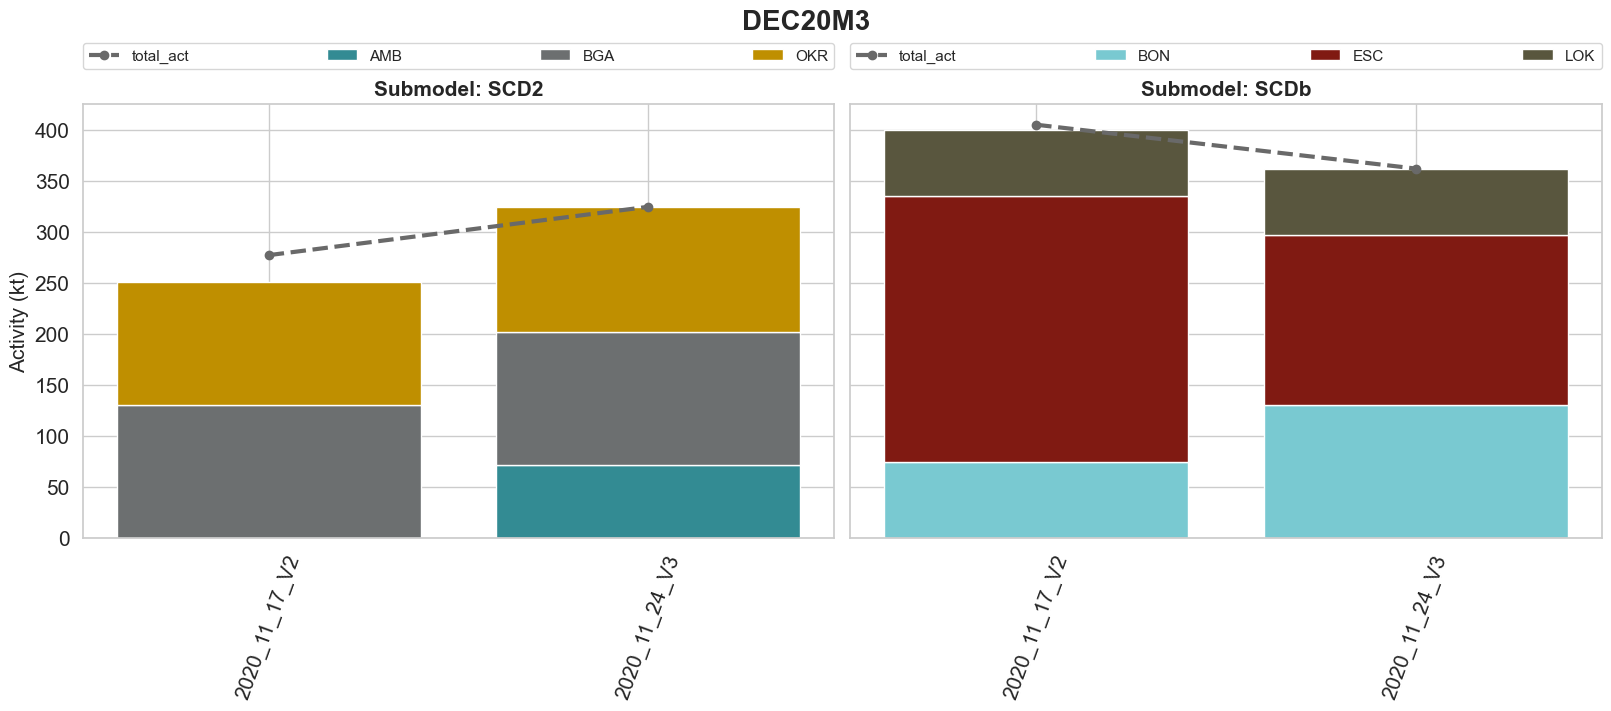

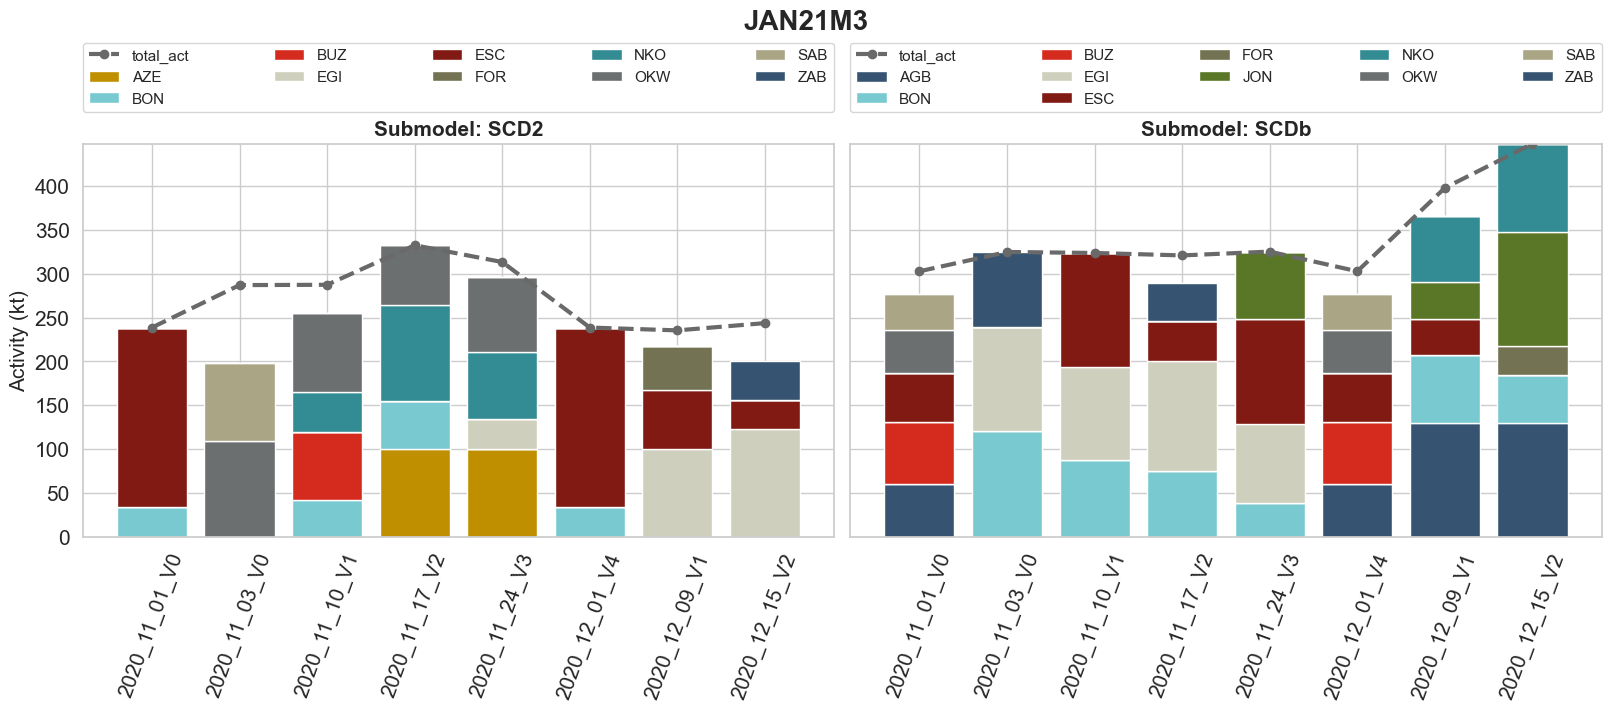

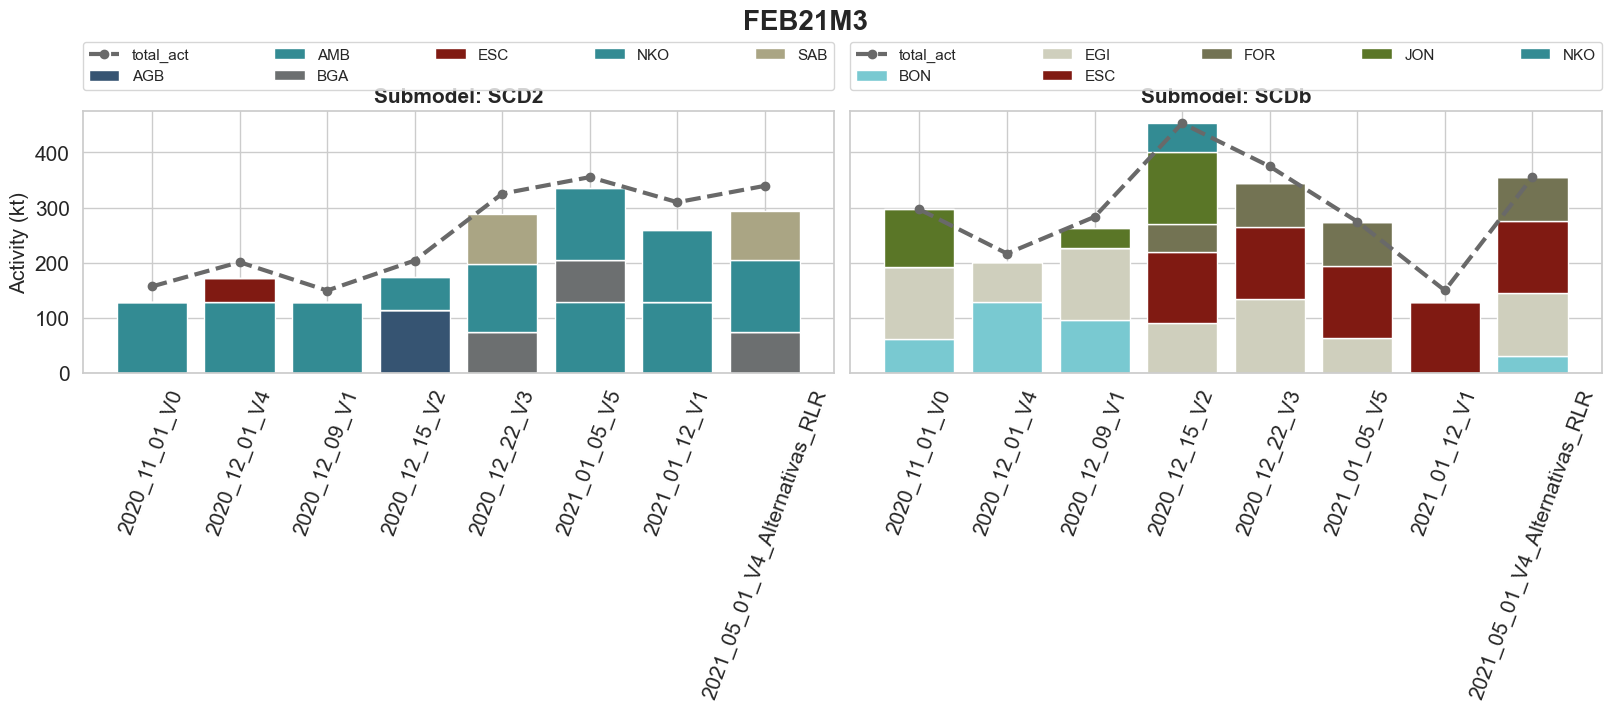

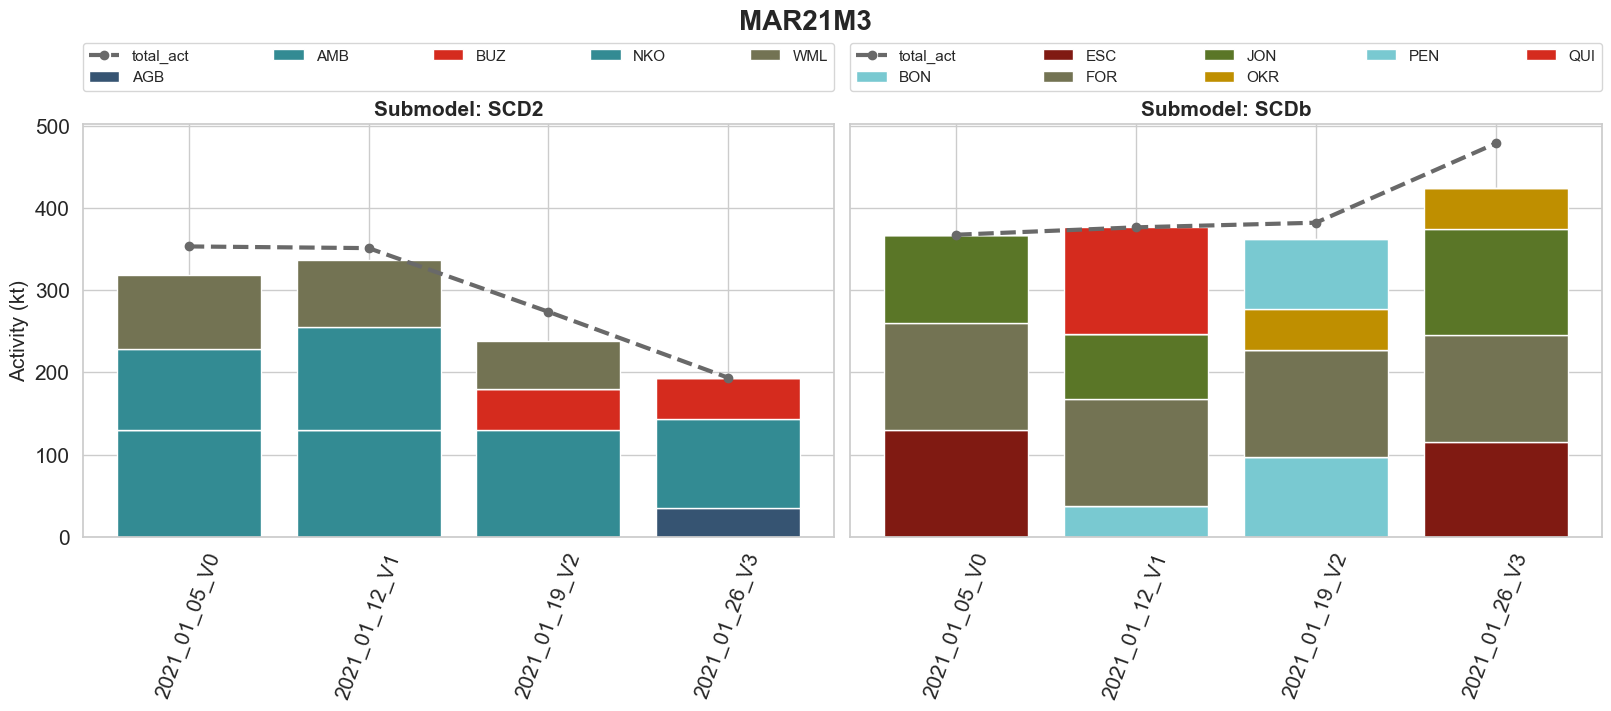

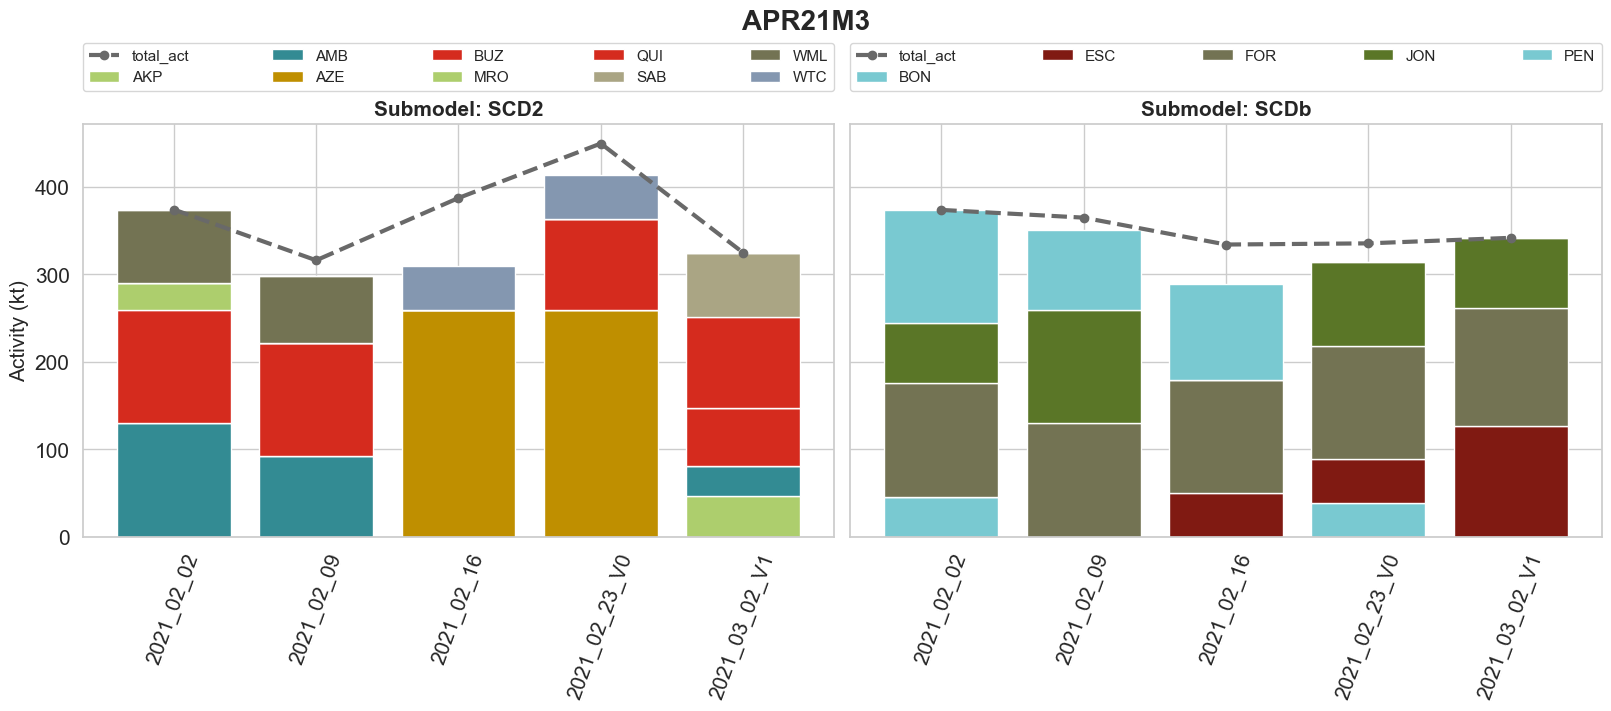

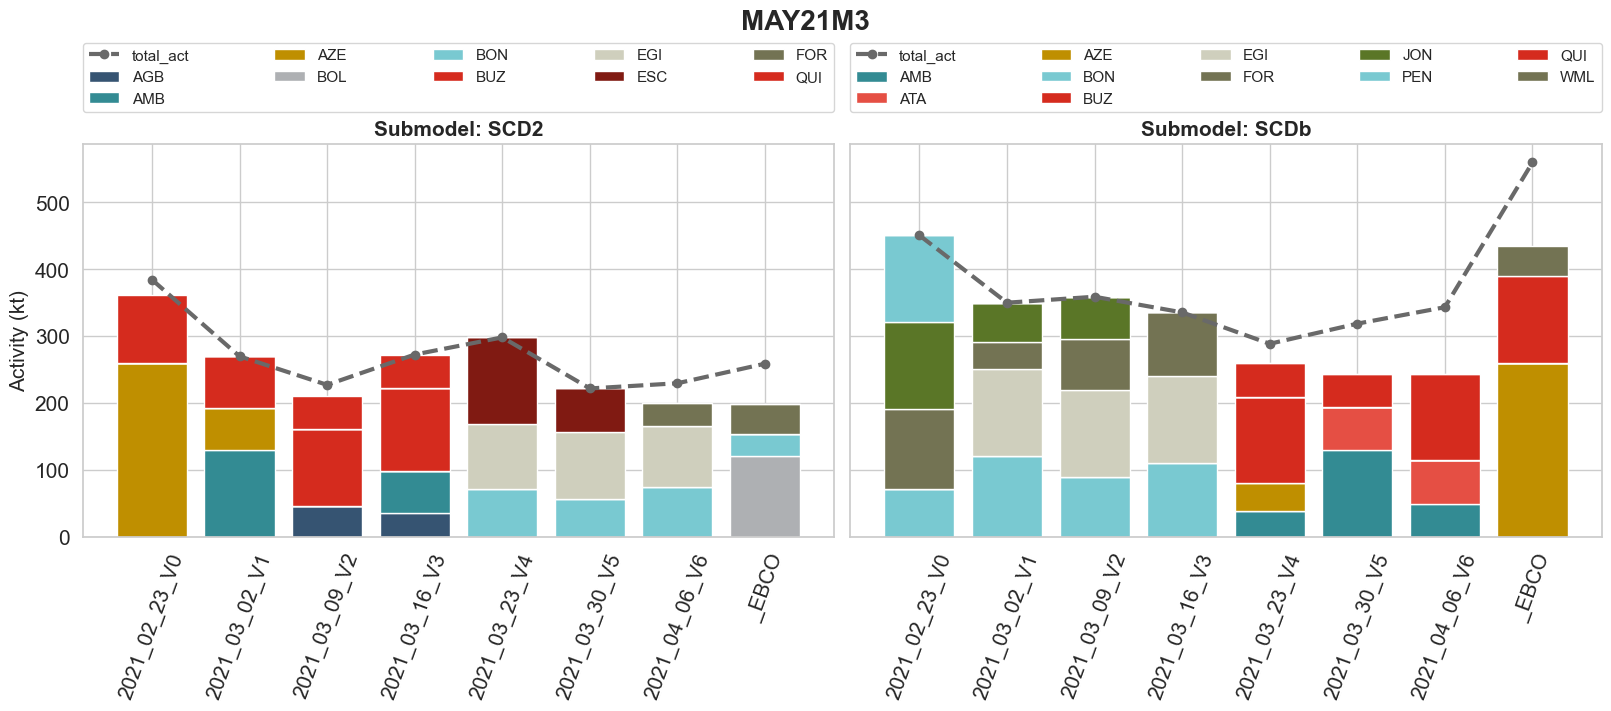

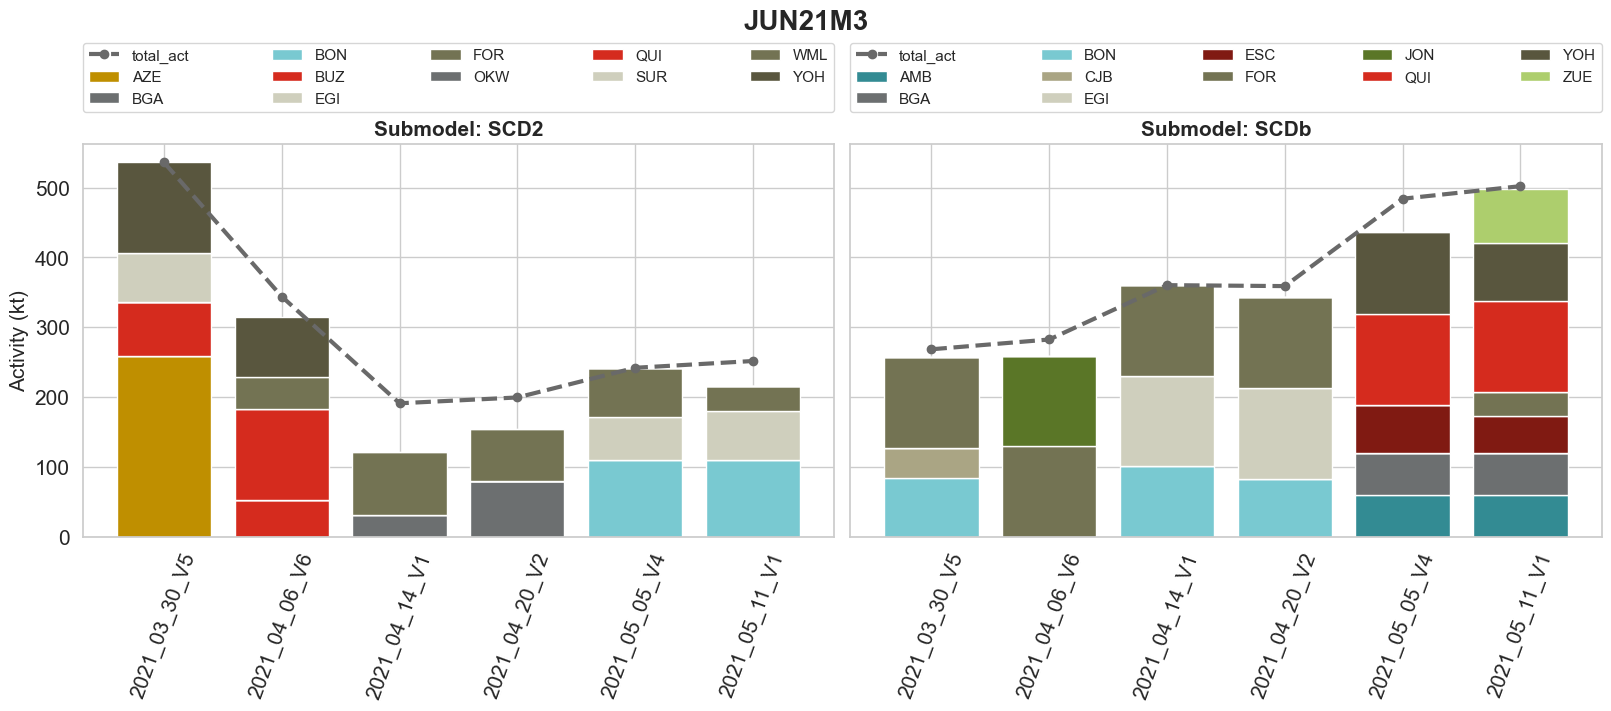

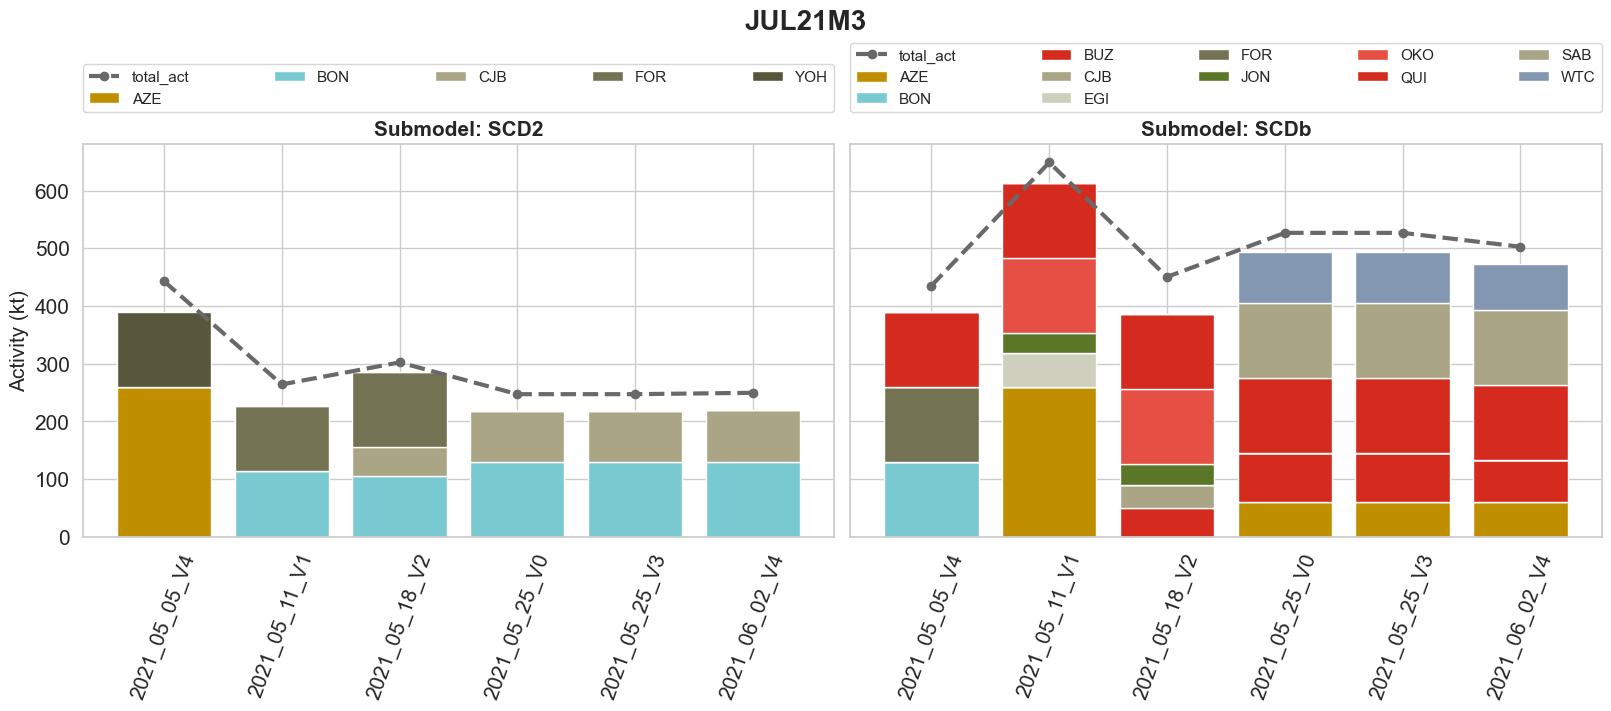

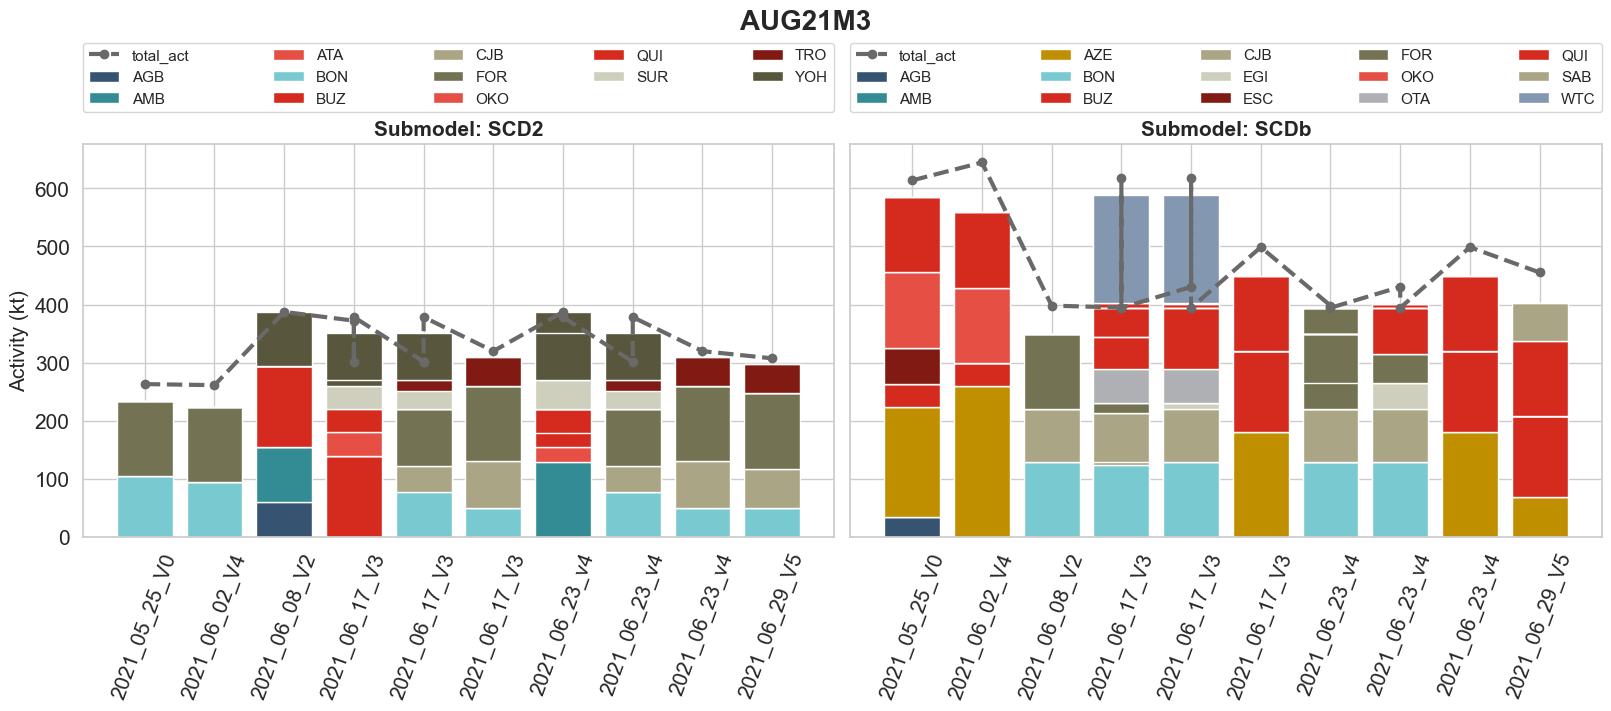

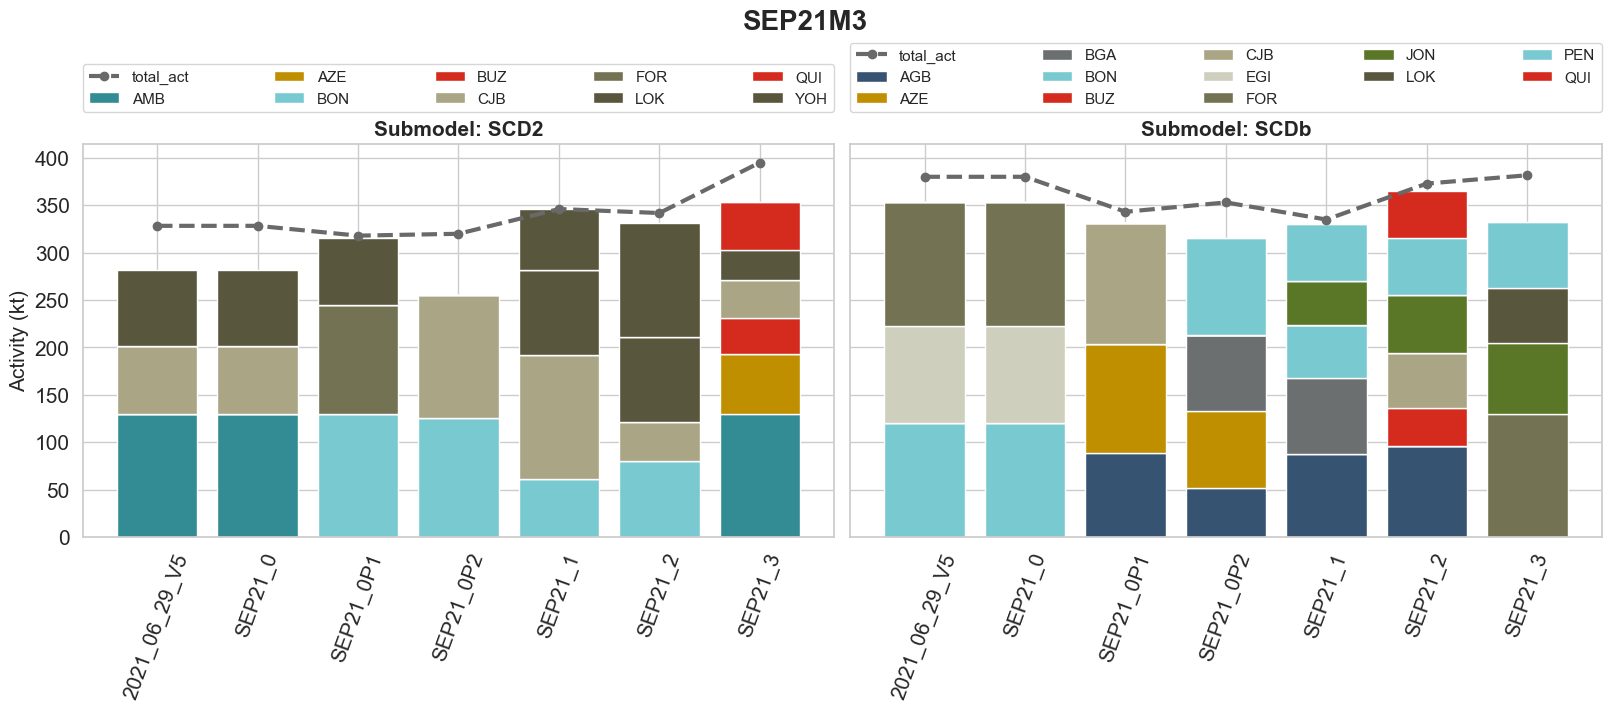

In [6]:
# Plot evolucion Cases Mensuales
dfs = [table_cd1_crudo, table_cd3_crudo]
descriptions = ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

min_activity = 30

for description in descriptions:
    pf.plot_2_pivot_tables_refinery(df_plot, final_columns_to_plot, description, min_activity)

## Destilación Crudo 1 PIMS

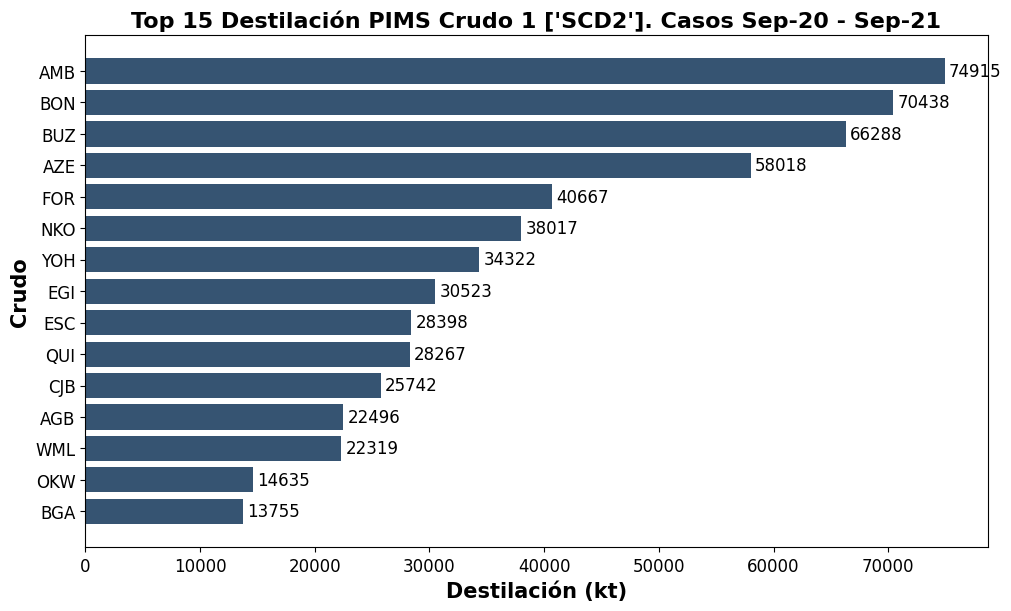

In [7]:
# Crudo 1 SCD2 Destilación por Crudos de table_cd1_crudo
submodel = ["SCD2"]
dfs = [table_cd1_crudo]
descriptions = table_cd1_crudo.Description.to_list()

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

top = 15
df_aux_cd = df_plot[df_plot["Submodel"].isin(submodel)]
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
desde = datetime.strftime(df_aux_cd["Month_order"].min(skipna = True), '%b-%y')
hasta = datetime.strftime(df_aux_cd["Month_order"].max(skipna = True), '%b-%y')
df_aux_cd.loc['Column_Total'] = df_aux_cd.sum(numeric_only = True, axis = 0)
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
df_aux_cd = df_aux_cd[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True).tail(top)

fig, ax = plt.subplots(figsize = (10, 6), constrained_layout = True)
ax.barh(df_aux_cd.index, 
        df_aux_cd["Column_Total"], color = "#365472")
ax.set_title(f"Top {top} Destilación PIMS Crudo 1 {submodel}. Casos {desde} - {hasta}", fontsize = 16, fontweight = 'bold')
ax.set_ylabel("Crudo", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Destilación (kt)", fontsize = 15, fontweight = 'bold')
ax.tick_params(axis="both", labelsize = 12)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 12)
plt.xticks(rotation=0)
plt.show();

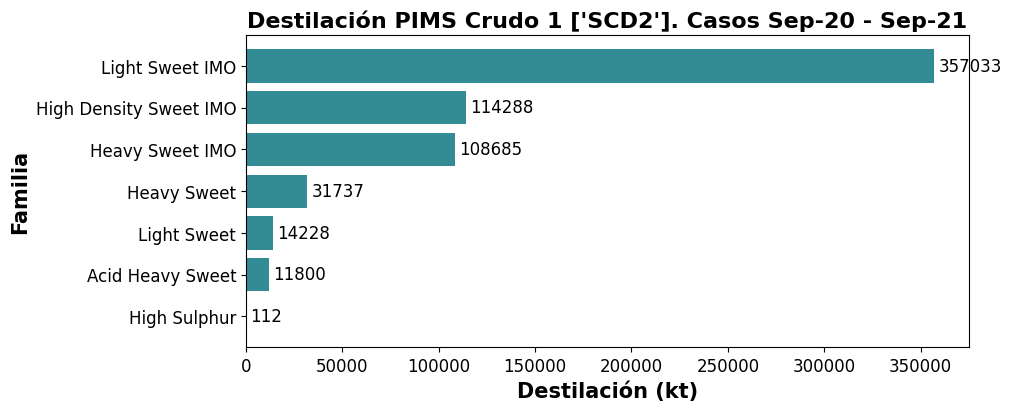

In [8]:
# Crudo 1 SCDb Destilación por Familias de table_cd3_familia
submodel = ["SCD2"]
dfs = [table_cd1_familia]
descriptions = table_cd1_familia.Description.to_list()

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

df_aux_cd = df_plot[df_plot["Submodel"].isin(submodel)]
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
desde = datetime.strftime(df_aux_cd["Month_order"].min(skipna = True), '%b-%y')
hasta = datetime.strftime(df_aux_cd["Month_order"].max(skipna = True), '%b-%y')
df_aux_cd.loc['Column_Total'] = df_aux_cd.sum(numeric_only = True, axis = 0)
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
df_aux_cd = df_aux_cd[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True).tail(15)

fig, ax = plt.subplots(figsize = (10, 4), constrained_layout = True)
ax.barh(df_aux_cd.index, 
        df_aux_cd["Column_Total"], color = "#338B93")
ax.set_title(f"Destilación PIMS Crudo 1 {submodel}. Casos {desde} - {hasta}", fontsize = 16, fontweight = 'bold')
ax.set_ylabel("Familia", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Destilación (kt)", fontsize = 15, fontweight = 'bold')
ax.tick_params(axis="both", labelsize = 12)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 12)
plt.xticks(rotation=0)
plt.show();

## Destilación Crudo 3 PIMS

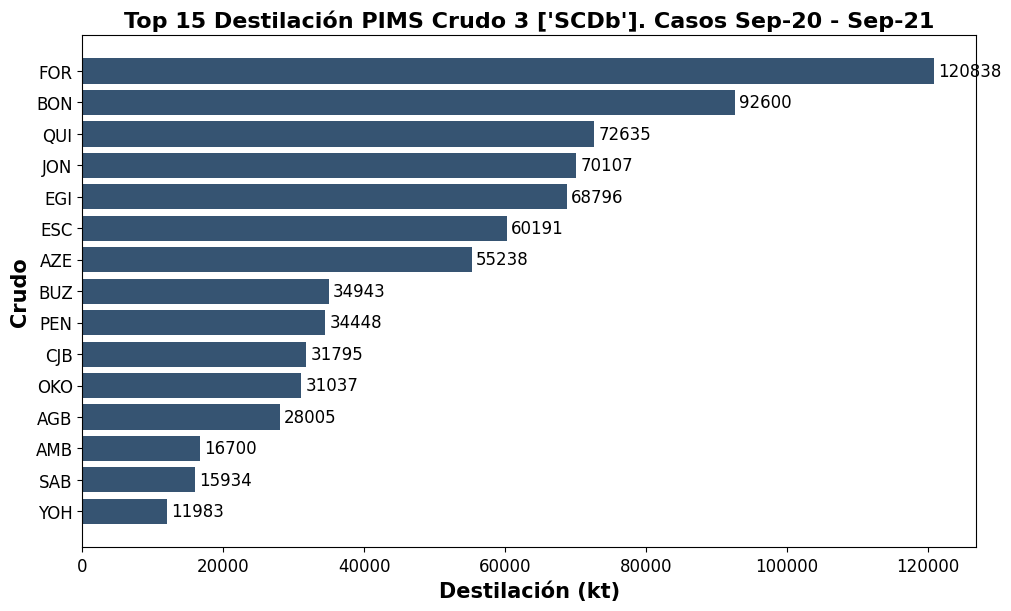

In [9]:
# Crudo 3 SCDb Destilación por Crudos de table_cd3_crudo
submodel = ["SCDb"]
dfs = [table_cd3_crudo]
descriptions = table_cd3_crudo.Description.to_list()

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

top = 15
df_aux_cd = df_plot[df_plot["Submodel"].isin(submodel)]
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
desde = datetime.strftime(df_aux_cd["Month_order"].min(skipna = True), '%b-%y')
hasta = datetime.strftime(df_aux_cd["Month_order"].max(skipna = True), '%b-%y')
df_aux_cd.loc['Column_Total'] = df_aux_cd.sum(numeric_only = True, axis = 0)
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
df_aux_cd = df_aux_cd[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True).tail(top)

fig, ax = plt.subplots(figsize = (10, 6), constrained_layout = True)
ax.barh(df_aux_cd.index, 
        df_aux_cd["Column_Total"], color = "#365472")
ax.set_title(f"Top {top} Destilación PIMS Crudo 3 {submodel}. Casos {desde} - {hasta}", fontsize = 16, fontweight = 'bold')
ax.set_ylabel("Crudo", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Destilación (kt)", fontsize = 15, fontweight = 'bold')
ax.tick_params(axis="both", labelsize = 12)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 12)
plt.xticks(rotation=0)
plt.show();

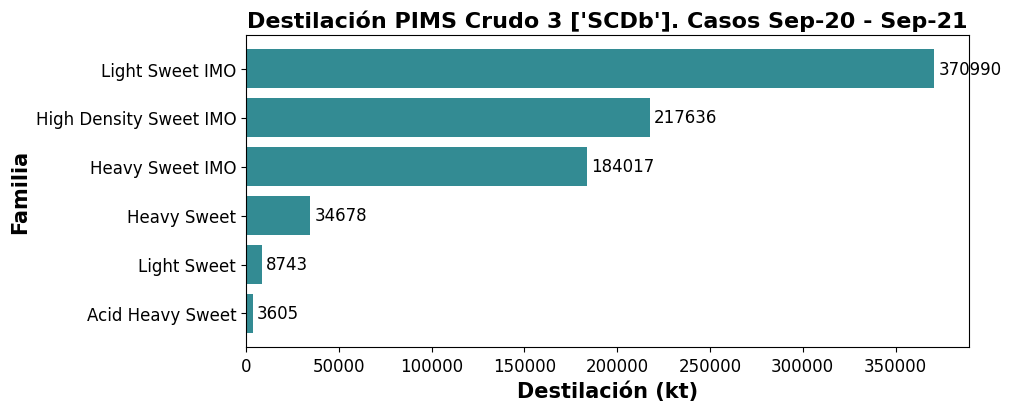

In [10]:
# Crudo 3 SCDb Destilación por Familias de table_cd3_familia
submodel = ["SCDb"]
dfs = [table_cd3_familia]
descriptions = table_cd3_familia.Description.to_list()

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

df_aux_cd = df_plot[df_plot["Submodel"].isin(submodel)]
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
desde = datetime.strftime(df_aux_cd["Month_order"].min(skipna = True), '%b-%y')
hasta = datetime.strftime(df_aux_cd["Month_order"].max(skipna = True), '%b-%y')
df_aux_cd.loc['Column_Total'] = df_aux_cd.sum(numeric_only = True, axis = 0)
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
df_aux_cd = df_aux_cd[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True).tail(15)

fig, ax = plt.subplots(figsize = (10, 4), constrained_layout = True)
ax.barh(df_aux_cd.index, 
        df_aux_cd["Column_Total"], color = "#338B93")
ax.set_title(f"Destilación PIMS Crudo 3 {submodel}. Casos {desde} - {hasta}", fontsize = 16, fontweight = 'bold')
ax.set_ylabel("Familia", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Destilación (kt)", fontsize = 15, fontweight = 'bold')
ax.tick_params(axis="both", labelsize = 12)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 12)
plt.xticks(rotation=0)
plt.show();

## Destilación Algeciras PIMS

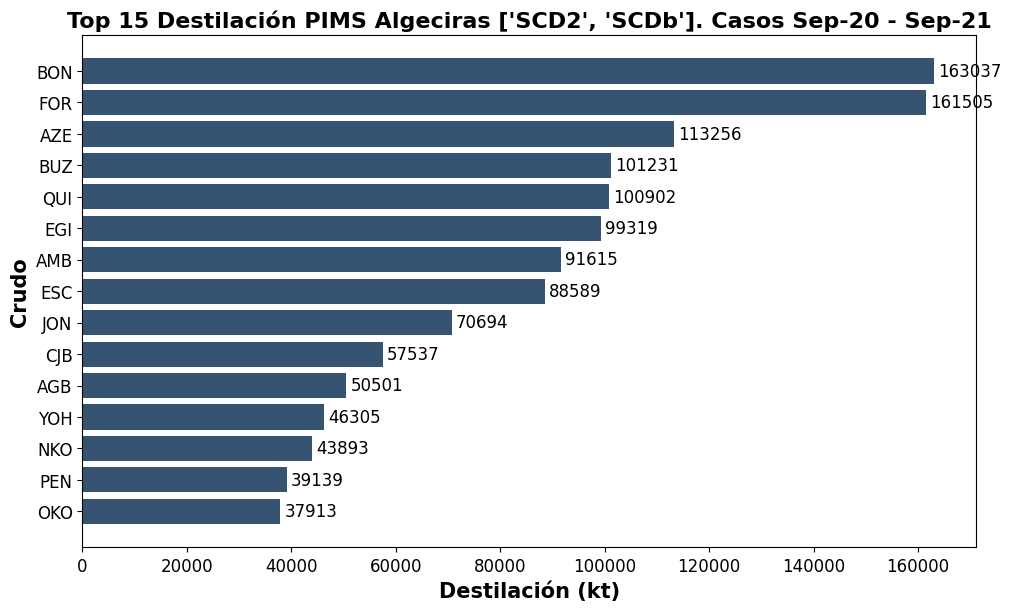

In [11]:
# Crudo 3 SCDb Destilación por Crudos de table_cd3_crudo
submodel = ["SCD2", "SCDb"]
dfs = [table_cd1_crudo, table_cd3_crudo]
descriptions = table_cd1_crudo.Description.to_list()

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

top = 15
df_aux_cd = df_plot[df_plot["Submodel"].isin(submodel)]
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
desde = datetime.strftime(df_aux_cd["Month_order"].min(skipna = True), '%b-%y')
hasta = datetime.strftime(df_aux_cd["Month_order"].max(skipna = True), '%b-%y')
df_aux_cd.loc['Column_Total'] = df_aux_cd.sum(numeric_only = True, axis = 0)
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
df_aux_cd = df_aux_cd[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True).tail(top)

fig, ax = plt.subplots(figsize = (10, 6), constrained_layout = True)
ax.barh(df_aux_cd.index, 
        df_aux_cd["Column_Total"], color = "#365472")
ax.set_title(f"Top {top} Destilación PIMS Algeciras {submodel}. Casos {desde} - {hasta}", fontsize = 16, fontweight = 'bold')
ax.set_ylabel("Crudo", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Destilación (kt)", fontsize = 15, fontweight = 'bold')
ax.tick_params(axis="both", labelsize = 12)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 12)
plt.xticks(rotation=0)
plt.show();

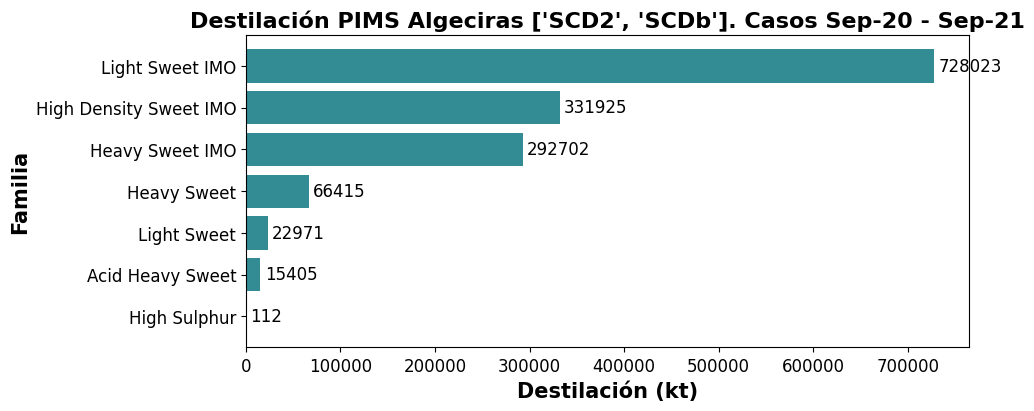

In [12]:
# Crudo 3 SCDb Destilación por Familias de table_cd3_familia
submodel = ["SCD2", "SCDb"]
dfs = [table_cd1_familia, table_cd3_familia]
descriptions = table_cd1_familia.Description.to_list()

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

df_aux_cd = df_plot[df_plot["Submodel"].isin(submodel)]
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
desde = datetime.strftime(df_aux_cd["Month_order"].min(skipna = True), '%b-%y')
hasta = datetime.strftime(df_aux_cd["Month_order"].max(skipna = True), '%b-%y')
df_aux_cd.loc['Column_Total'] = df_aux_cd.sum(numeric_only = True, axis = 0)
df_aux_cd["Month_order"] = pd.to_datetime(df_aux_cd["Month_order"], format='%Y-%m-%d %H:%M:%S', errors = "coerce")
df_aux_cd = df_aux_cd[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True).tail(15)

fig, ax = plt.subplots(figsize = (10, 4), constrained_layout = True)
ax.barh(df_aux_cd.index, 
        df_aux_cd["Column_Total"], color = "#338B93")
ax.set_title(f"Destilación PIMS Algeciras {submodel}. Casos {desde} - {hasta}", fontsize = 16, fontweight = 'bold')
ax.set_ylabel("Familia", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Destilación (kt)", fontsize = 15, fontweight = 'bold')
ax.tick_params(axis="both", labelsize = 12)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 12)
plt.xticks(rotation=0)
plt.show();

# Realidad RGSR 12/2020 - 08/2021

Cargado df con la información de las compras de crudo por parte de PILOTAGE:
(2298, 61)


Código Fecha Pedido Código Fecha Fecha pedida Fecha Desc. Refinería  \
0           40701RGSR    40695RGSR   2011-06-07  2011-06-01      RGSR   
1            40701RLR     40695RLR   2011-06-07  2011-06-01       RLR   
2            40701RLR     40696RLR   2011-06-07  2011-06-02       RLR   

                  Crudo Cantidad Observaciones MES ABASTEC BARCO ETA   CD  \
0           Kole Marine   110978  Tenerife sp.         NaN   NaN NaT  NaN   
1  RUSSIAN EXPORT BLEND   129374          Reef         NaN   NaN NaT  NaN   
2              Qua Iboe   122072    Toledo sp.         NaN   NaN NaT  NaN   

  FECHA DESCARGA CRUDO2  CANTIDAD (t) Estado  API  %S FAMILIA  \
0            NaT    NaN           NaN    NaN  NaN NaN     NaN   
1            NaT    NaN           NaN    NaN  NaN NaN     NaN   
2            NaT    NaN           NaN    NaN  NaN NaN     NaN   

  FÓRMULA COMPRA \n(PROGRAMA)  ESTIMACIÓN FLETE \n(PROGRAMA)  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   

  FÓRMULA COMPRA \n(BUDGET)  ESTIMACIÓN FLETE \n(BUDGET)  D FÓRMULA COMPRA  \
0                       NaN                          NaN               NaN   
1                       NaN                          NaN               NaN   
2                       NaN                          NaN               NaN   

   D ESTIMACIÓN FLETE Cierre FECHA CARGA Comentarios Otros comentarios  \
0                 NaN    NaN         NaT         NaN               NaN   
1                 NaN    NaN         NaT         NaN               NaN   
2                 NaN    NaN         NaT         NaN               NaN   

   DEAL STRATEGY FECHA COMPRA LCi LCf ETBallegro ETS LAi LAf ETAallegro  \
0            NaN          NaN NaT NaT   00:00:00 NaT NaT NaT   00:00:00   
1            NaN          NaN NaT NaT   00:00:00 NaT NaT NaT   00:00:00   
2            NaN          NaN NaT NaT   00:00:00 NaT NaT NaT   00:00:00   

  PRICING Rev PIMS  Inc RGSR  Inc RLR Tomahawk vigente FLETE REAL  \
0     NaN      NaN       NaN      NaN              NaN        NaN   
1     NaN      NaN       NaN      NaN              NaN        NaN   
2     NaN      NaN       NaN      NaN              NaN        NaN   

   ESTIMACIÓN COMPRA\n(PIMS)  ESTIMACIÓN FLETE\n(PIMS)  API*  %S* en camino  \
0                        NaN                       NaN   NaN  NaN       NaN   
1                        NaN                       NaN   NaN  NaN       NaN   
2                        NaN                       NaN   NaN  NaN       NaN   

   CARGA  DESCARGA DEMORAS  DEMORAS ($/día) Operador  DESVÍO PEDIDO  \
0    NaN       NaN     NaN              NaN      NaN       -40701.0   
1    NaN       NaN     NaN              NaN      NaN       -40701.0   
2    NaN       NaN     NaN              NaN      NaN       -40701.0   

   DESVÍO ALLEGRO  DESVÍO DESCARGA      ETB-I  ETS-ETB  ETA-ETS  ETD-ETA  
0             0.0           -40701 1778-07-29      0.0      0.0      0.0  
1             0.0           -40701 1778-07-29      0.0      0.0      0.0  
2             0.0           -40701 1778-07-29      0.0      0.0      0.0

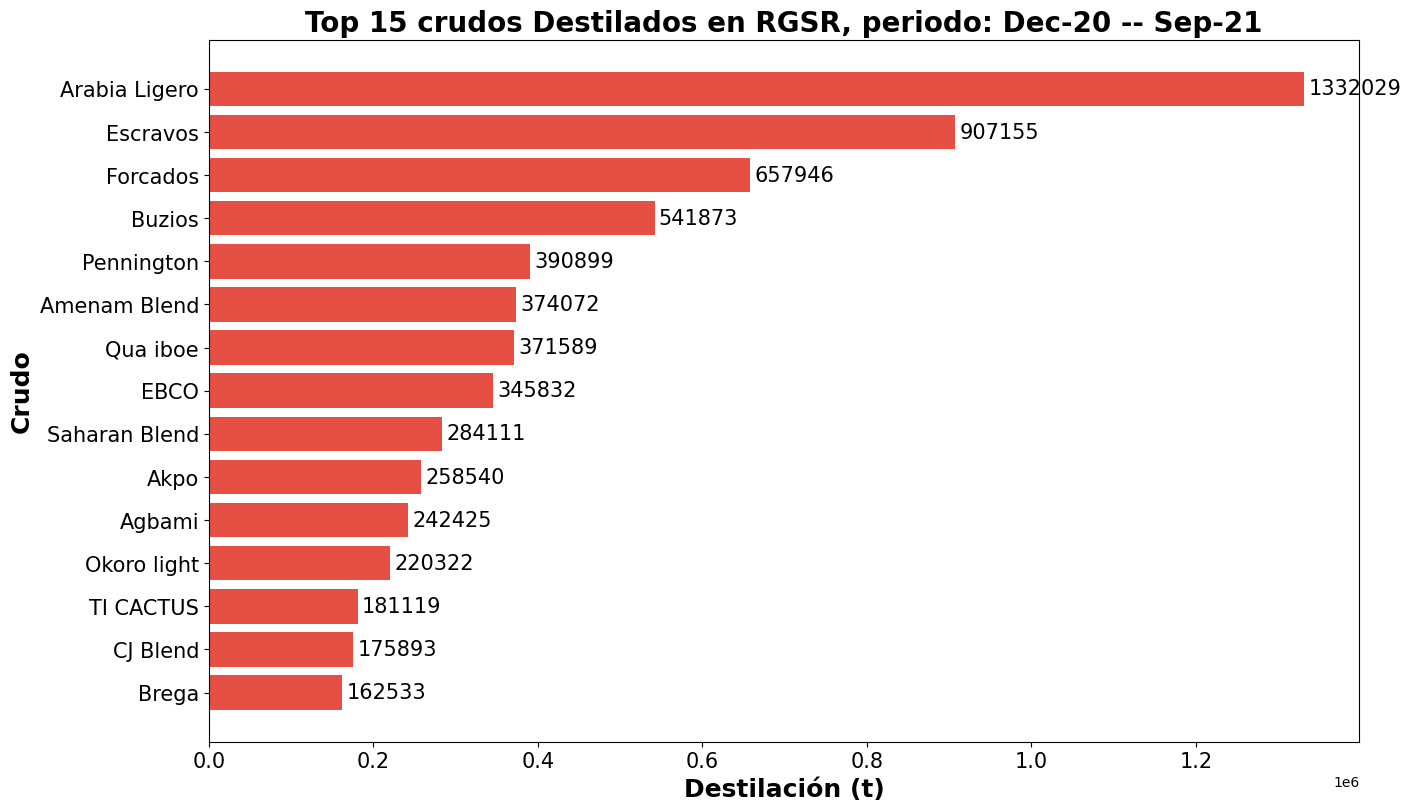

Dataframe agrupando df_raspa por crudo, df_dest_merge Head(10)


Refinería          Crudo   Cantidad           NAME PIMS  \
0      RGSR  ARABIA LIGERO  1332029.0  ARABIA LIGERO  ARL   
1      RGSR       ESCRAVOS   907155.0       ESCRAVOS  ESC   
2      RGSR       FORCADOS   657946.0       FORCADOS  FOR   
3      RGSR         BUZIOS   541873.0         BUZIOS  BUZ   
4      RGSR     PENNINGTON   390899.0     PENNINGTON  PEN   
5      RGSR   AMENAM BLEND   374072.0   AMENAM BLEND  AMB   
6      RGSR       QUA IBOE   371589.0       QUA IBOE  QUI   
7      RGSR           EBCO   345832.0           EBCO  KIR   
8      RGSR  SAHARAN BLEND   284111.0  SAHARAN BLEND  SAB   
9      RGSR           AKPO   258540.0           AKPO  AKP   

            Familia + IMO  
0            High Sulphur  
1         Light Sweet IMO  
2  High Density Sweet IMO  
3         Heavy Sweet IMO  
4         Light Sweet IMO  
5         Light Sweet IMO  
6         Light Sweet IMO  
7            High Sulphur  
8         Light Sweet IMO  
9         Light Sweet IMO

Filtrar por las siguientes Familias para crudos LS en df_raspa:  ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']


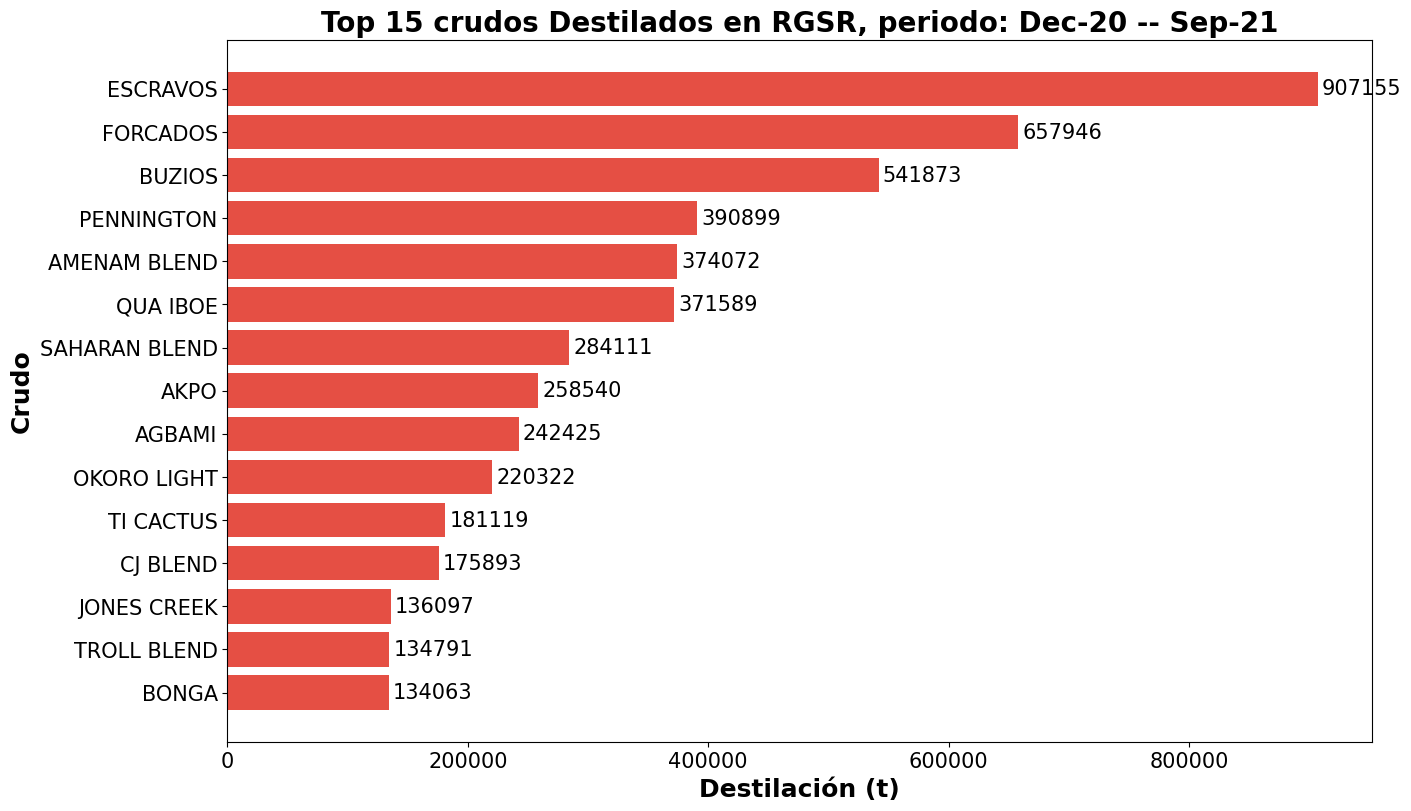

Dataframe returned Head(4):


Cantidad
Refinería Crudo               
RGSR      ESCRAVOS    907155.0
          FORCADOS    657946.0
          BUZIOS      541873.0
          PENNINGTON  390899.0

In [40]:
excel_raspa = r"C:\Users\JESCOBARO\Desktop\CDX_PIMS\Raspa Crudos PILOTAGE.xlsm"
hoja_excel = "CRUDOS"
refineria = "RGSR"
desde = "2020-12-01"
hasta = "2021-09-01"
top = 15

df_raspa = rp.cargar_raspacrudos(excel_raspa, hoja_excel, print_returns = True)
df_dest = rp.crudos_destilados(df_raspa, refineria = refineria, desde = desde, hasta = hasta, top = top, plot_returns = True, print_returns = False)

# Añadir Familia a la Raspa para poder filtrar por crudos IMO
df_nombres = df[["NAME", "PIMS", "Familia + IMO"]]
df_nombres["NAME"] = df_nombres['NAME'].str.upper()
df_nombres = df_nombres.drop_duplicates(subset="PIMS", keep='last')
df_dest_merge = df_dest.reset_index()
df_dest_merge["Crudo"] = df_dest_merge['Crudo'].str.upper()
df_dest_merge = df_dest_merge.merge(df_nombres, how="left", left_on = "Crudo", right_on = "NAME")
print("Dataframe agrupando df_raspa por crudo, df_dest_merge Head(10)")
display(df_dest_merge.head(10))
familias = ["Light Sweet IMO", "High Density Sweet IMO", "Heavy Sweet IMO"]
crudos_imo = df_dest_merge[df_dest_merge["Familia + IMO"].isin(familias)]["Crudo"].to_list()

# Filtrar por crudos IMO
df_raspa_filter = df_raspa.copy()
df_raspa_filter["Crudo"] = df_raspa_filter['Crudo'].str.upper()
df_raspa_filter = df_raspa_filter[df_raspa_filter['Crudo'].isin(crudos_imo)]

# Plot results
print("=====================================")
print("Filtrar por las siguientes Familias para crudos LS en df_raspa: ", familias)
df_dest_imo = rp.crudos_destilados(df_raspa_filter, refineria = refineria, desde = desde, hasta = hasta, top = top, print_returns = True)

In [138]:
crudos_elegidos = ["BON", "FOR", "AMB", "BUZ", "CJB", "QUI", "YOH"]
crudos_elegidos = ["BON", "FOR"]
crudos_elegidos = ["AMB", "BUZ"]

df_dest_merge[df_dest_merge["PIMS"].isin(crudos_elegidos)][["NAME", "PIMS", "Cantidad", "Familia + IMO"]]

NAME PIMS  Cantidad    Familia + IMO
3        BUZIOS  BUZ  541873.0  Heavy Sweet IMO
5  AMENAM BLEND  AMB  374072.0  Light Sweet IMO

# Crudo 1 LS (SCD2) Agrupaciones

In [43]:
# Generar Pivot tables de los crudos sobre 'Crudo'
df_origen = df_algeciras.copy()
submodel_cd1 =  "SCD2"
agrupacion_crudo = "Crudo"

# Pivot table crudo
table_cd1_crudo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd1, agrupacion_crudo, print_returns=False)
table_cd1_crudo.head(3)

Crudo                           Description        Version  CaseID Submodel  \
2087   SEP20M3(Nuevos Assays y SC Abiertos)  2020_12_15_V2     901     SCD2   
2088   SEP20M3(Nuevos Assays y SC Abiertos)  2021_05_11_V1     903     SCD2   
1960                                DEC20M3  2020_11_17_V2      12     SCD2   

Crudo  ABO  AGB  AJE  AKP         AMB  ATA  ...  TIE  TIP  TRO  WML  \
2087   0.0  0.0  0.0  0.0    0.000000  0.0  ...  0.0  0.0  0.0  0.0   
2088   0.0  0.0  0.0  0.0  101.616798  0.0  ...  0.0  0.0  0.0  0.0   
1960   0.0  0.0  0.0  0.0    0.000000  0.0  ...  0.0  0.0  0.0  0.0   

Crudo        WTC       WTL  YOH  ZAB  Month_order  Version_order  
2087    0.000000   0.00000  0.0  0.0   2020-09-01     2020-12-15  
2088   89.910004   0.00000  0.0  0.0   2020-09-01     2021-05-11  
1960    0.000000  26.44311  0.0  0.0   2020-12-01     2020-11-17  

[3 rows x 57 columns]

Shape inicial:  (2097, 58)


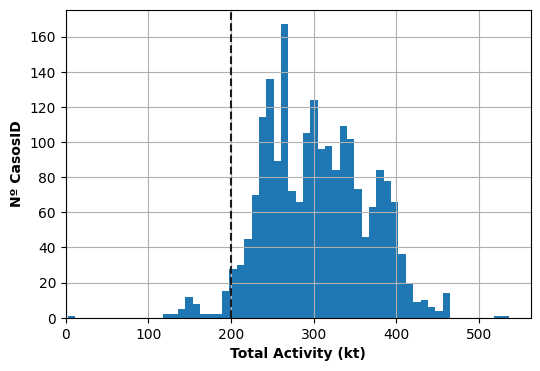

Shape final:  (2043, 58)


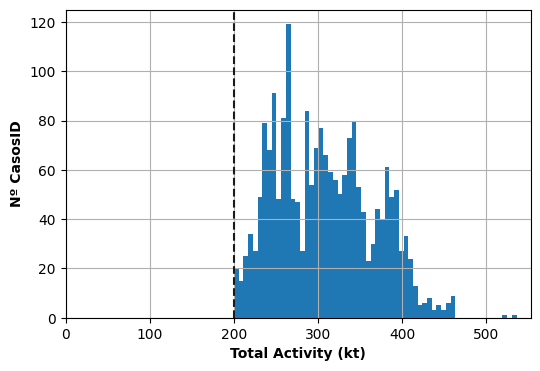

Crudo                           Description        Version  CaseID Submodel  \
2088   SEP20M3(Nuevos Assays y SC Abiertos)  2021_05_11_V1     903     SCD2   
1960                                DEC20M3  2020_11_17_V2      12     SCD2   
1961                                DEC20M3  2020_11_24_V3      12     SCD2   

Crudo  ABO  AGB  AJE  AKP         AMB  ATA  ...  TIP  TRO  WML        WTC  \
2088   0.0  0.0  0.0  0.0  101.616798  0.0  ...  0.0  0.0  0.0  89.910004   
1960   0.0  0.0  0.0  0.0    0.000000  0.0  ...  0.0  0.0  0.0   0.000000   
1961   0.0  0.0  0.0  0.0   72.159950  0.0  ...  0.0  0.0  0.0   0.000000   

Crudo  WTL  YOH  ZAB  Month_order  Version_order  Total_activity  
2088   0.0  0.0  0.0   2020-09-01     2021-05-11      257.188467  
1960   0.0  0.0  0.0   2020-12-01     2020-11-17      277.109499  
1961   0.0  0.0  0.0   2020-12-01     2020-11-24      324.449707  

[3 rows x 58 columns]

In [44]:
# Eliminar filas con Total_activity < min_total_act y después en crudos < min_act_crudo poner 0
min_total_act = 200
min_act_crudo = 70

cols_crudos = table_cd1_crudo.select_dtypes('number').columns.tolist()
cols_crudos.remove("CaseID")
table_cd1_crudo_filter = table_cd1_crudo.copy()
table_cd1_crudo_filter["Total_activity"] = table_cd1_crudo_filter[cols_crudos].sum(axis=1)
print("Shape inicial: ", table_cd1_crudo_filter.shape)

# Buscar el corte gráficamente
table_cd1_crudo_filter.Total_activity.hist(bins = 60, figsize = (6, 4))
plt.axvline(x = min_total_act, color='k', linestyle='--')
plt.xlabel("Total Activity (kt)", fontweight = 'bold')
plt.ylabel("Nº CasosID", fontweight = 'bold')
plt.xlim(left = 0)
plt.show();

table_cd1_crudo_filter = table_cd1_crudo_filter[table_cd1_crudo_filter["Total_activity"] >= min_total_act]

# Cambio valores menores a min_activity_crudo por 0
for col in cols_crudos:
    a = np.array(table_cd1_crudo_filter[col].values.tolist())
    table_cd1_crudo_filter[col] = np.where(a < min_act_crudo, 0, a).tolist()
    
print("Shape final: ", table_cd1_crudo_filter.shape)
table_cd1_crudo_filter.head(3)

# Hist final
table_cd1_crudo_filter.Total_activity.hist(bins = 60, figsize = (6, 4))
plt.axvline(x = min_total_act, color='k', linestyle='--')
plt.xlabel("Total Activity (kt)", fontweight = 'bold')
plt.ylabel("Nº CasosID", fontweight = 'bold')
plt.xlim(left = 0)
plt.show();

display(table_cd1_crudo_filter.head(3))

In [47]:
df_bool, list_bool_cols = rp.col_to_bool(table_cd1_crudo_filter, cols_crudos, print_returns=True)
print("\nSe realiza agrupación ===============\n")
df_agrup = rp.agrup_by_cols_combination(df_bool, list_bool_cols, count="CaseID", print_returns=True)

Creadas columnas_bool en dataframe:


Crudo                           Description        Version  CaseID Submodel  \
2088   SEP20M3(Nuevos Assays y SC Abiertos)  2021_05_11_V1     903     SCD2   
1960                                DEC20M3  2020_11_17_V2      12     SCD2   
1961                                DEC20M3  2020_11_24_V3      12     SCD2   

Crudo  ABO  AGB  AJE  AKP         AMB  ATA  AZE  BAU      BGA  BOL  BON  BUZ  \
2088   0.0  0.0  0.0  0.0  101.616798  0.0  0.0  0.0    0.000  0.0  0.0  0.0   
1960   0.0  0.0  0.0  0.0    0.000000  0.0  0.0  0.0  129.987  0.0  0.0  0.0   
1961   0.0  0.0  0.0  0.0   72.159950  0.0  0.0  0.0  129.987  0.0  0.0  0.0   

Crudo  CAE  CEP  CJB  E44  E46  EGI  ERH  ESC  ESH  FOR  GUL  IRA  JON  LIV  \
2088   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1960   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1961   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

Crudo  LOK  MEL  MRO  NKO  NOD  OBE  OKO         OKR  OKW  OTA  PEN  QAR  QUI  \
2088   0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0  0.0  0.0  0.0   
1960   0.0  0.0  0.0  0.0  0.0  0.0  0.0  120.679390  0.0  0.0  0.0  0.0  0.0   
1961   0.0  0.0  0.0  0.0  0.0  0.0  0.0  122.302757  0.0  0.0  0.0  0.0  0.0   

Crudo  SAB  SAP  SKF  SUR  TIE  TIP  TRO  WML        WTC  WTL  YOH  ZAB  \
2088   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  89.910004  0.0  0.0  0.0   
1960   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0   
1961   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0   

Crudo Month_order Version_order  Total_activity  ABO_bool  AGB_bool  AJE_bool  \
2088   2020-09-01    2021-05-11      257.188467         0         0         0   
1960   2020-12-01    2020-11-17      277.109499         0         0         0   
1961   2020-12-01    2020-11-24      324.449707         0         0         0   

Crudo  AKP_bool  AMB_bool  ATA_bool  AZE_bool  BAU_bool  BGA_bool  BOL_bool  \
2088          0         1         0         0         0         0         0   
1960          0         0         0         0         0         1         0   
1961          0         1         0         0         0         1         0   

Crudo  BON_bool  BUZ_bool  CAE_bool  CEP_bool  CJB_bool  E44_bool  E46_bool  \
2088          0         0         0         0         0         0         0   
1960          0         0         0         0         0         0         0   
1961          0         0         0         0         0         0         0   

Crudo  EGI_bool  ERH_bool  ESC_bool  ESH_bool  FOR_bool  GUL_bool  IRA_bool  \
2088          0         0         0         0         0         0         0   
1960          0         0         0         0         0         0         0   
1961          0         0         0         0         0         0         0   

Crudo  JON_bool  LIV_bool  LOK_bool  MEL_bool  MRO_bool  NKO_bool  NOD_bool  \
2088          0         0         0         0         0         0         0   
1960          0         0         0         0         0         0         0   
1961          0         0         0         0         0         0         0   

Crudo  OBE_bool  OKO_bool  OKR_bool  OKW_bool  OTA_bool  PEN_bool  QAR_bool  \
2088          0         0         0         0         0         0         0   
1960          0         0         1         0         0         0         0   
1961          0         0         1         0         0         0         0   

Crudo  QUI_bool  SAB_bool  SAP_bool  SKF_bool  SUR_bool  TIE_bool  TIP_bool  \
2088          0         0         0         0         0         0         0   
1960          0         0         0         0         0         0         0   
1961          0         0         0         0         0         0         0   

Crudo  TRO_bool  WML_bool  WTC_bool  WTL_bool  YOH_bool  ZAB_bool  
2088          0         0         1         0         0         0  
1960          0         0         0         0         0 

Principio lista creada con columnas_bool:  ['ABO_bool', 'AGB_bool', 'AJE_bool', 'AKP_bool', 'AMB_bool'] ...

Se realiza agrupación ===============

Shape de la agrupación de las columnas_bool:  (120, 54)
Se realiza el conteo sobre:  CaseID


ABO_bool  AGB_bool  AJE_bool  AKP_bool  AMB_bool  ATA_bool  AZE_bool  \
53          0         0         0         0         0         0         0   
110         0         0         0         0         1         0         0   
58          0         0         0         0         0         0         0   

     BAU_bool  BGA_bool  BOL_bool  BON_bool  BUZ_bool  CAE_bool  CEP_bool  \
53          0         0         0         1         0         0         0   
110         0         0         0         0         1         0         0   
58          0         0         0         1         0         0         0   

     CJB_bool  E44_bool  E46_bool  EGI_bool  ERH_bool  ESC_bool  ESH_bool  \
53          0         0         0         0         0         0         0   
110         0         0         0         0         0         0         0   
58          1         0         0         0         0         0         0   

     FOR_bool  GUL_bool  IRA_bool  JON_bool  LIV_bool  LOK_bool  MEL_bool  \
53          1         0         0         0         0         0         0   
110         0         0         0         0         0         0         0   
58          0         0         0         0         0         0         0   

     MRO_bool  NKO_bool  NOD_bool  OBE_bool  OKO_bool  OKR_bool  OKW_bool  \
53          0         0         0         0         0         0         0   
110         0         0         0         0         0         0         0   
58          0         0         0         0         0         0         0   

     OTA_bool  PEN_bool  QAR_bool  QUI_bool  SAB_bool  SAP_bool  SKF_bool  \
53          0         0         0         0         0         0         0   
110         0         0         0         0         0         0         0   
58          0         0         0         0         0         0         0   

     SUR_bool  TIE_bool  TIP_bool  TRO_bool  WML_bool  WTC_bool  WTL_bool  \
53          0         0         0         0         0         0         0   
110         0         0         0         0         0         0         0   
58          0         0         0         0         0         0         0   

     YOH_bool  ZAB_bool                                             CaseID  \
53          0         0  [7, 7, 8, 8, 8, 8, 507, 521, 526, 602, 604, 60...   
110         0         0  [5, 115, 307, 309, 319, 326, 307, 337, 324, 32...   
58          0         0  [7, 7, 7, 9, 9, 9, 703, 703, 701, 701, 702, 70...   

     Num_CaseID Crudos_Comb  
53          229  [BON, FOR]  
110          99  [AMB, BUZ]  
58           86  [BON, CJB]

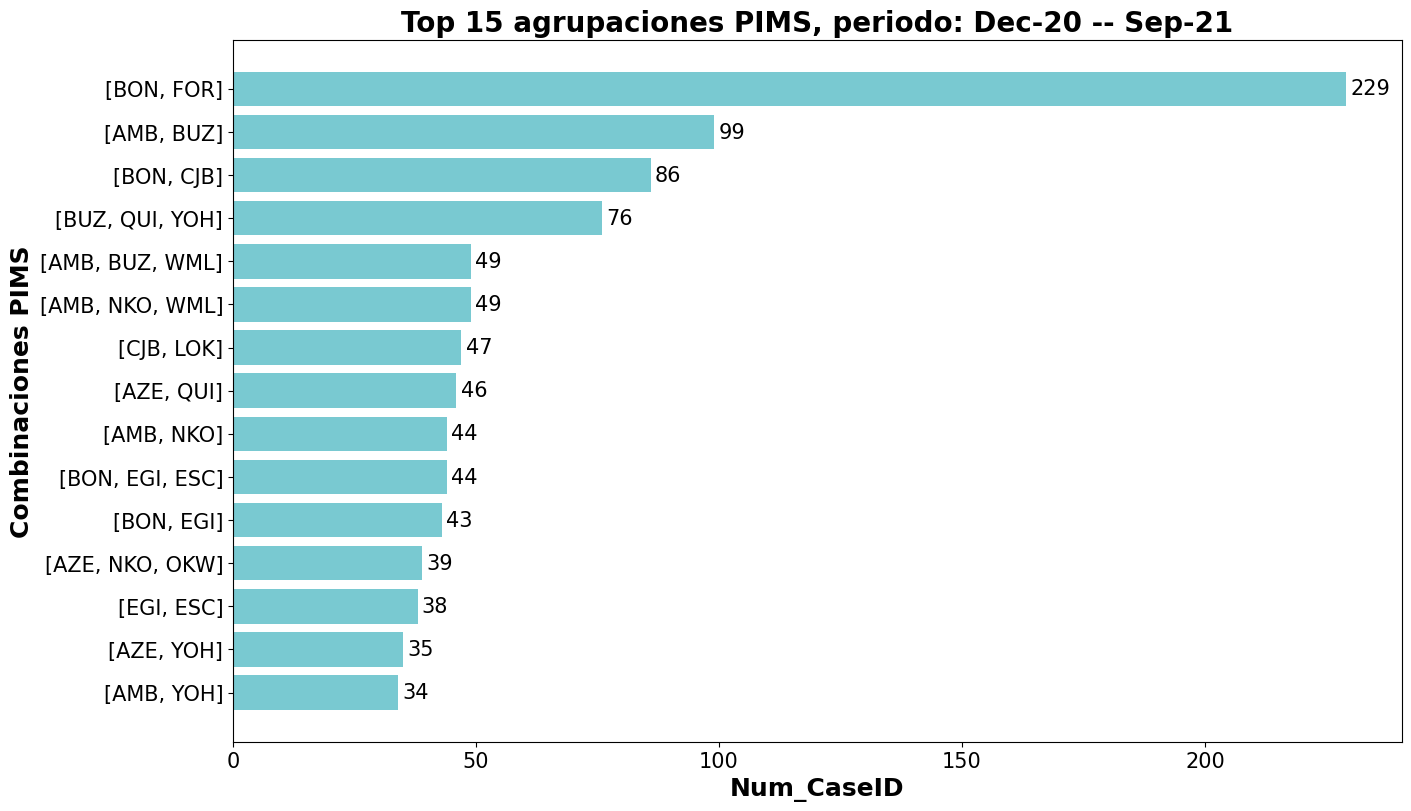

In [77]:
top = 15
desde = "Dec-20"
hasta = "Sep-21"

df_plot = df_agrup.sort_values(by="Num_CaseID").tail(top).reset_index(drop = True)
y_axis = list(df_plot["Crudos_Comb"])
for y in y_axis:
    y_axis[y_axis.index(y)] = str(y).replace("'", "")
y_pos = np.arange(len(y_axis))

fig, ax = plt.subplots(figsize = (14, 8), constrained_layout = True)
ax.barh(df_plot.index, df_plot["Num_CaseID"],  color = "#79C9D1")
ax.set_title(f"Top {top} agrupaciones PIMS, periodo: {desde} -- {hasta}", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Combinaciones PIMS", fontsize = 18, fontweight = 'bold')
ax.set_xlabel("Num_CaseID", fontsize = 18, fontweight = 'bold')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.tick_params(axis = "both", labelsize = 15)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 15)
plt.show();

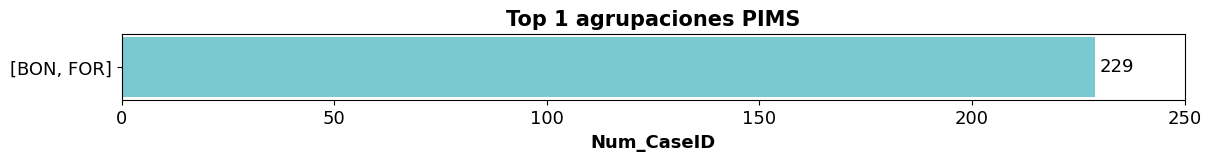

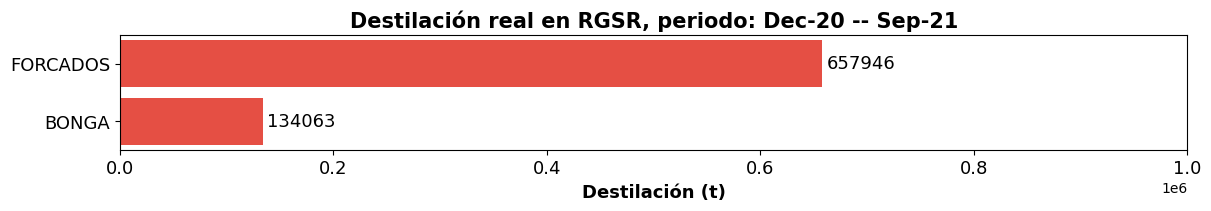

FOR representa un  11.2 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
BON representa un  2.28 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']


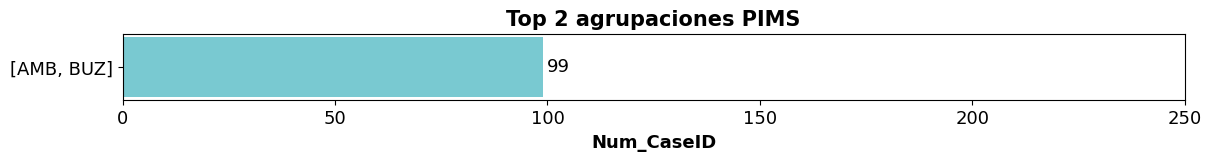

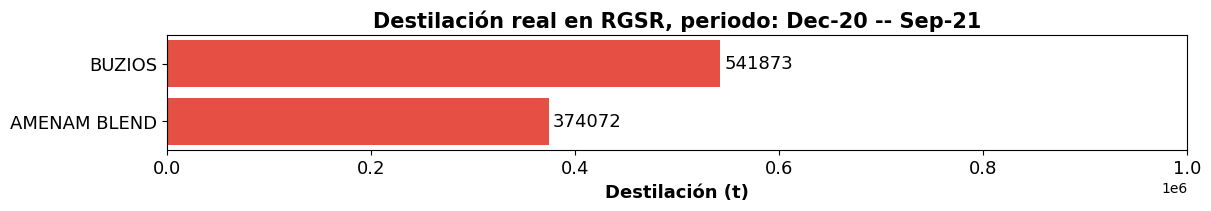

BUZ representa un  9.23 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
AMB representa un  6.37 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']


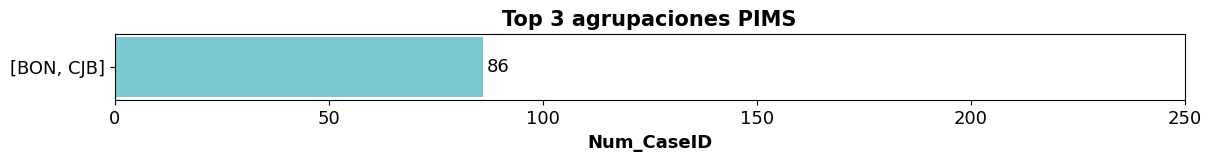

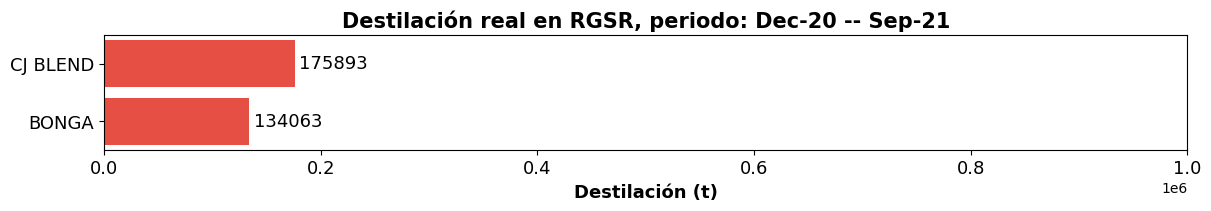

CJB representa un  2.99 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
BON representa un  2.28 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']


In [51]:
best = 3
df_plot = df_agrup.sort_values(by="Num_CaseID", ascending = False).head(best).reset_index(drop = True)
max_x = round(df_plot.Num_CaseID.max()/10 + 2)*10
max_x_2 = 1000000

for b in range(best):
    df_aux = df_plot.iloc[[b]]
    y_axis = list(df_aux["Crudos_Comb"])
    for y in y_axis:
        y_axis[y_axis.index(y)] = str(y).replace("'", "")
    y_pos = np.arange(len(y_axis)) + b

    fig, ax = plt.subplots(figsize = (12, 1.5), constrained_layout = True)
    ax.barh(df_aux.index, df_aux["Num_CaseID"],  color = "#79C9D1")
    ax.set_title(f"Top {b + 1} agrupaciones PIMS", fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Num_CaseID", fontsize = 13, fontweight = 'bold')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_axis)
    ax.tick_params(axis = "both", labelsize = 13)
    ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 13)
    ax.set_xlim(0, max_x)
    plt.show();
    
    crudes = list(df_aux["Crudos_Comb"])[0]
    df_aux_2 = df_dest_merge[df_dest_merge["PIMS"].isin(crudes)].sort_values(by="Cantidad", ascending = True)
    
    fig, ax = plt.subplots(figsize = (12, 2), constrained_layout = True)
    ax.barh(df_aux_2.Crudo, df_aux_2.Cantidad,  color = "#E54F44")
    ax.set_title(f"Destilación real en {refineria}, periodo: {desde} -- {hasta}", fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Destilación (t)", fontsize = 13, fontweight = 'bold')
    ax.tick_params(axis="both", labelsize = 13)
    ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 13)
    ax.set_xlim(0, max_x_2)
    plt.show();
    
    for crude in list(df_aux_2.PIMS)[::-1]:
        porcentaje = 100*df_dest_merge[df_dest_merge.PIMS == crude]["Cantidad"]/df_dest_merge[df_dest_merge["Familia + IMO"].isin(familias)]["Cantidad"].sum()
        print(str(crude), "representa un ", round(float(porcentaje), 2), "% de la cesta total de familias", familias)
    
    print("=====================================")

# Crudo 3 LS (SCDb) Agrupaciones

In [140]:
# Generar Pivot tables de los crudos sobre 'Crudo'
df_origen = df_algeciras.copy()
submodel_cd1 =  "SCDb"
agrupacion_crudo = "Crudo"

# Pivot table crudo
table_cd1_crudo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd1, agrupacion_crudo, print_returns=False)
table_cd1_crudo.head(3)

Crudo                           Description        Version  CaseID Submodel  \
2091   SEP20M3(Nuevos Assays y SC Abiertos)  2020_12_15_V2     901     SCDb   
2092   SEP20M3(Nuevos Assays y SC Abiertos)  2021_05_11_V1     903     SCDb   
1964                                DEC20M3  2020_11_17_V2      12     SCDb   

Crudo        ABO  AGB  AJE  AKP        AMB  ATA  ...  TIP  TRO  WML  \
2091    0.000000  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.0  0.0   
2092   89.910004  0.0  0.0  0.0  17.284399  0.0  ...  0.0  0.0  0.0   
1964    0.000000  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.0  0.0   

Crudo        WTC       WTL  YOH  ZAB  ZUE  Month_order  Version_order  
2091   81.445015  0.000000  0.0  0.0  0.0   2020-09-01     2020-12-15  
2092    0.000000  0.000000  0.0  0.0  0.0   2020-09-01     2021-05-11  
1964    0.000000  4.715137  0.0  0.0  0.0   2020-12-01     2020-11-17  

[3 rows x 56 columns]

Shape inicial:  (2101, 57)


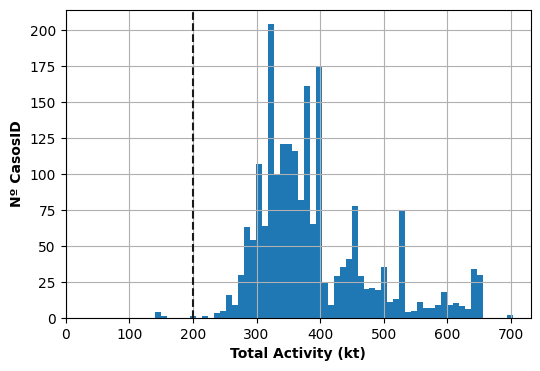

Shape final:  (2095, 57)


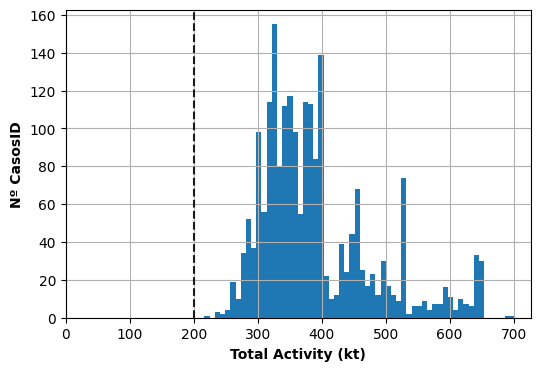

Crudo                           Description        Version  CaseID Submodel  \
2091   SEP20M3(Nuevos Assays y SC Abiertos)  2020_12_15_V2     901     SCDb   
2092   SEP20M3(Nuevos Assays y SC Abiertos)  2021_05_11_V1     903     SCDb   
1964                                DEC20M3  2020_11_17_V2      12     SCDb   

Crudo        ABO  AGB  AJE  AKP  AMB  ATA  ...  TRO  WML        WTC  WTL  YOH  \
2091    0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  81.445015  0.0  0.0   
2092   89.910004  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   0.000000  0.0  0.0   
1964    0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   0.000000  0.0  0.0   

Crudo  ZAB  ZUE  Month_order  Version_order  Total_activity  
2091   0.0  0.0   2020-09-01     2020-12-15      448.048944  
2092   0.0  0.0   2020-09-01     2021-05-11      404.872074  
1964   0.0  0.0   2020-12-01     2020-11-17      404.798077  

[3 rows x 57 columns]

In [141]:
# Eliminar filas con Total_activity < min_total_act y después en crudos < min_act_crudo poner 0
min_total_act = 200
min_act_crudo = 70

cols_crudos = table_cd1_crudo.select_dtypes('number').columns.tolist()
cols_crudos.remove("CaseID")
table_cd1_crudo_filter = table_cd1_crudo.copy()
table_cd1_crudo_filter["Total_activity"] = table_cd1_crudo_filter[cols_crudos].sum(axis=1)
print("Shape inicial: ", table_cd1_crudo_filter.shape)

# Buscar el corte gráficamente
table_cd1_crudo_filter.Total_activity.hist(bins = 60, figsize = (6, 4))
plt.axvline(x = min_total_act, color='k', linestyle='--')
plt.xlabel("Total Activity (kt)", fontweight = 'bold')
plt.ylabel("Nº CasosID", fontweight = 'bold')
plt.xlim(left = 0)
plt.show();

table_cd1_crudo_filter = table_cd1_crudo_filter[table_cd1_crudo_filter["Total_activity"] >= min_total_act]

# Cambio valores menores a min_activity_crudo por 0
for col in cols_crudos:
    a = np.array(table_cd1_crudo_filter[col].values.tolist())
    table_cd1_crudo_filter[col] = np.where(a < min_act_crudo, 0, a).tolist()
    
print("Shape final: ", table_cd1_crudo_filter.shape)
table_cd1_crudo_filter.head(3)

# Hist final
table_cd1_crudo_filter.Total_activity.hist(bins = 60, figsize = (6, 4))
plt.axvline(x = min_total_act, color='k', linestyle='--')
plt.xlabel("Total Activity (kt)", fontweight = 'bold')
plt.ylabel("Nº CasosID", fontweight = 'bold')
plt.xlim(left = 0)
plt.show();

display(table_cd1_crudo_filter.head(3))

In [142]:
df_bool, list_bool_cols = rp.col_to_bool(table_cd1_crudo_filter, cols_crudos, print_returns=True)
print("\nSe realiza agrupación ===============\n")
df_agrup = rp.agrup_by_cols_combination(df_bool, list_bool_cols, count="CaseID", print_returns=True)

Creadas columnas_bool en dataframe:


Crudo                           Description        Version  CaseID Submodel  \
2091   SEP20M3(Nuevos Assays y SC Abiertos)  2020_12_15_V2     901     SCDb   
2092   SEP20M3(Nuevos Assays y SC Abiertos)  2021_05_11_V1     903     SCDb   
1964                                DEC20M3  2020_11_17_V2      12     SCDb   

Crudo        ABO  AGB  AJE  AKP  AMB  ATA  AZE  BAU  BGA  BOL       BON  \
2091    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00000   
2092   89.910004  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00000   
1964    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  75.11544   

Crudo      BUZ  CAE  CEP  CJB  E46  EGI  ERH         ESC  ESH        FOR  GUL  \
2091   129.987  0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  99.076485  0.0   
2092   129.597  0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  86.761482  0.0   
1964     0.000  0.0  0.0  0.0  0.0  0.0  0.0  259.973999  0.0   0.000000  0.0   

Crudo  IRA  JON  LOK  MEL  MRO  NKO  NOD  OBE  OKO  OKR  OKW  OTA  PEN  QAR  \
2091   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2092   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1964   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

Crudo  QUI  SAB  SAP  SKF  SUR  TIE  TIP  TRO  WML        WTC  WTL  YOH  ZAB  \
2091   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  81.445015  0.0  0.0  0.0   
2092   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0   
1964   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.0  0.0   

Crudo  ZUE Month_order Version_order  Total_activity  ABO_bool  AGB_bool  \
2091   0.0  2020-09-01    2020-12-15      448.048944         0         0   
2092   0.0  2020-09-01    2021-05-11      404.872074         1         0   
1964   0.0  2020-12-01    2020-11-17      404.798077         0         0   

Crudo  AJE_bool  AKP_bool  AMB_bool  ATA_bool  AZE_bool  BAU_bool  BGA_bool  \
2091          0         0         0         0         0         0         0   
2092          0         0         0         0         0         0         0   
1964          0         0         0         0         0         0         0   

Crudo  BOL_bool  BON_bool  BUZ_bool  CAE_bool  CEP_bool  CJB_bool  E46_bool  \
2091          0         0         1         0         0         0         0   
2092          0         0         1         0         0         0         0   
1964          0         1         0         0         0         0         0   

Crudo  EGI_bool  ERH_bool  ESC_bool  ESH_bool  FOR_bool  GUL_bool  IRA_bool  \
2091          0         0         0         0         1         0         0   
2092          0         0         0         0         1         0         0   
1964          0         0         1         0         0         0         0   

Crudo  JON_bool  LOK_bool  MEL_bool  MRO_bool  NKO_bool  NOD_bool  OBE_bool  \
2091          0         0         0         0         0         0         0   
2092          0         0         0         0         0         0         0   
1964          0         0         0         0         0         0         0   

Crudo  OKO_bool  OKR_bool  OKW_bool  OTA_bool  PEN_bool  QAR_bool  QUI_bool  \
2091          0         0         0         0         0         0         0   
2092          0         0         0         0         0         0         0   
1964          0         0         0         0         0         0         0   

Crudo  SAB_bool  SAP_bool  SKF_bool  SUR_bool  TIE_bool  TIP_bool  TRO_bool  \
2091          0         0         0         0         0         0         0   
2092          0         0         0         0         0         0         0   
1964          0         0         0         0         0         0         0   

Crudo  WML_bool  WTC_bool  WTL_bool  YOH_bool  ZAB_bool  ZUE_bool  
2091          0         1         0         0         0         0  
2092          0         0         0         0         0         0  
1964    

Principio lista creada con columnas_bool:  ['ABO_bool', 'AGB_bool', 'AJE_bool', 'AKP_bool', 'AMB_bool'] ...

Se realiza agrupación ===============

Shape de la agrupación de las columnas_bool:  (180, 53)
Se realiza el conteo sobre:  CaseID


ABO_bool  AGB_bool  AJE_bool  AKP_bool  AMB_bool  ATA_bool  AZE_bool  \
98         0         0         0         0         0         0         0   
94         0         0         0         0         0         0         0   
19         0         0         0         0         0         0         0   

    BAU_bool  BGA_bool  BOL_bool  BON_bool  BUZ_bool  CAE_bool  CEP_bool  \
98         0         0         0         1         0         0         0   
94         0         0         0         1         0         0         0   
19         0         0         0         0         0         0         0   

    CJB_bool  E46_bool  EGI_bool  ERH_bool  ESC_bool  ESH_bool  FOR_bool  \
98         1         0         0         0         0         0         1   
94         0         0         1         0         0         0         1   
19         0         0         0         0         0         0         1   

    GUL_bool  IRA_bool  JON_bool  LOK_bool  MEL_bool  MRO_bool  NKO_bool  \
98         0         0         0         0         0         0         0   
94         0         0         0         0         0         0         0   
19         0         0         1         0         0         0         0   

    NOD_bool  OBE_bool  OKO_bool  OKR_bool  OKW_bool  OTA_bool  PEN_bool  \
98         0         0         0         0         0         0         0   
94         0         0         0         0         0         0         0   
19         0         0         0         0         0         0         0   

    QAR_bool  QUI_bool  SAB_bool  SAP_bool  SKF_bool  SUR_bool  TIE_bool  \
98         0         0         0         0         0         0         0   
94         0         0         0         0         0         0         0   
19         0         0         0         0         0         0         0   

    TIP_bool  TRO_bool  WML_bool  WTC_bool  WTL_bool  YOH_bool  ZAB_bool  \
98         0         0         0         0         0         0         0   
94         0         0         0         0         0         0         0   
19         0         0         0         0         0         0         0   

    ZUE_bool                                             CaseID  Num_CaseID  \
98         0  [8, 8, 81, 81, 8, 81, 81, 80, 805, 802, 803, 8...         163   
94         0  [105, 5, 5, 200, 6, 6, 9, 9, 502, 503, 501, 51...         128   
19         0  [400, 400, 509, 508, 507, 506, 505, 504, 503, ...         124   

        Crudos_Comb  
98  [BON, CJB, FOR]  
94  [BON, EGI, FOR]  
19       [FOR, JON]

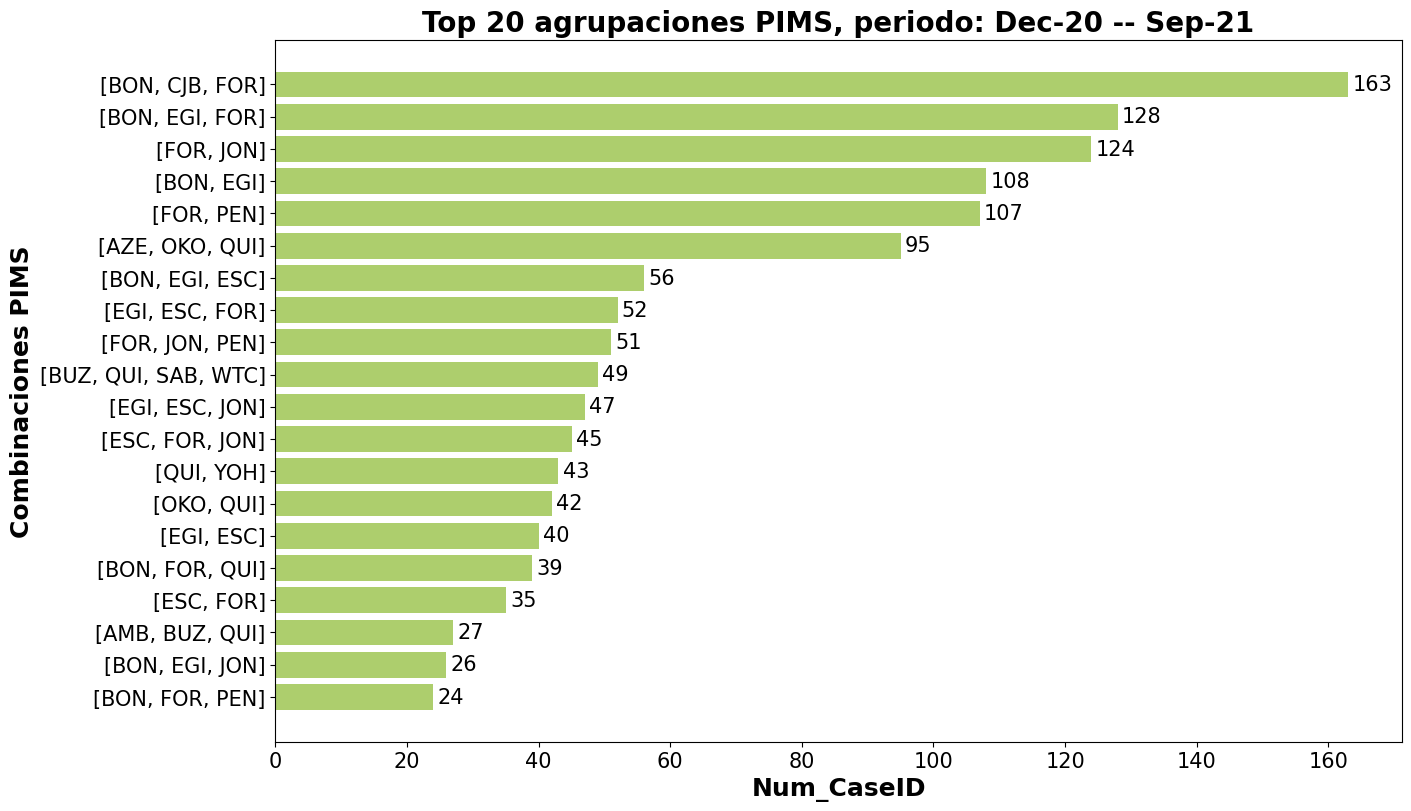

In [145]:
top = 20
df_plot = df_agrup.sort_values(by="Num_CaseID").tail(top).reset_index(drop = True)
y_axis = list(df_plot["Crudos_Comb"])
for y in y_axis:
    y_axis[y_axis.index(y)] = str(y).replace("'", "")
y_pos = np.arange(len(y_axis))

fig, ax = plt.subplots(figsize = (14, 8), constrained_layout = True)
ax.barh(df_plot.index, df_plot["Num_CaseID"],  color = "#ADCE6D")
ax.set_title(f"Top {top} agrupaciones PIMS, periodo: {desde} -- {hasta}", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Combinaciones PIMS", fontsize = 18, fontweight = 'bold')
ax.set_xlabel("Num_CaseID", fontsize = 18, fontweight = 'bold')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.tick_params(axis = "both", labelsize = 15)
ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 15)
plt.show();

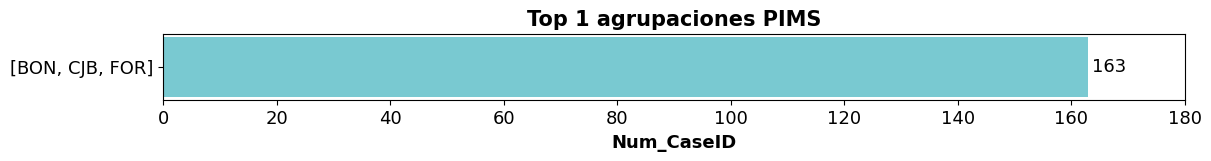

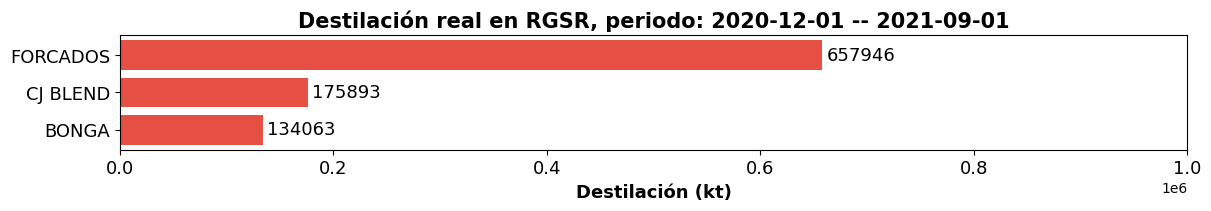

FOR representa un  11.2 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
CJB representa un  2.99 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
BON representa un  2.28 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']


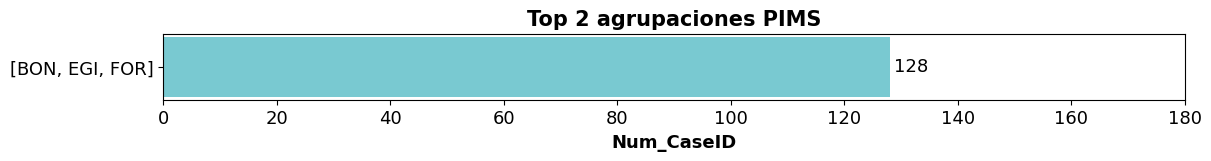

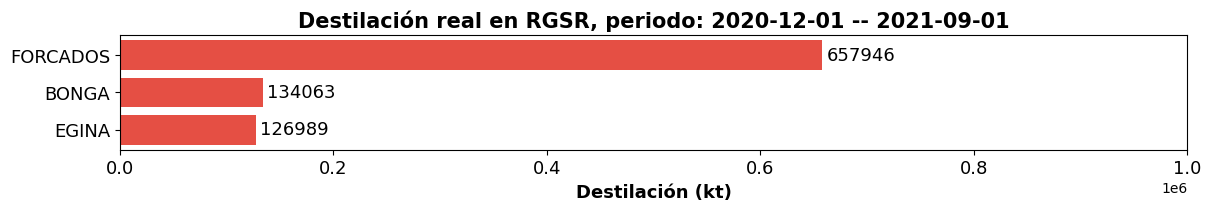

FOR representa un  11.2 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
BON representa un  2.28 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
EGI representa un  2.16 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']


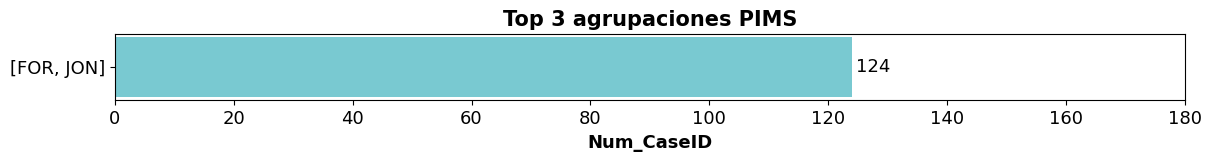

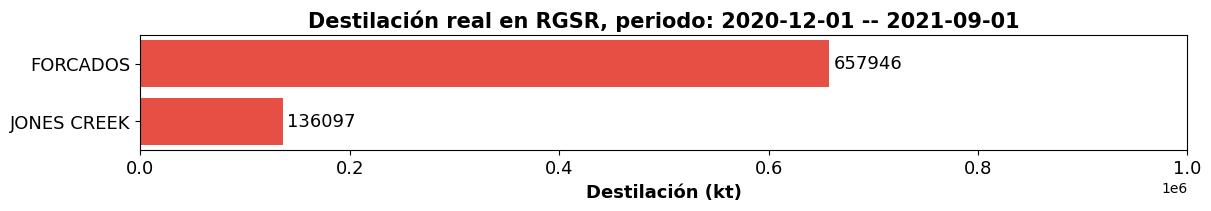

FOR representa un  11.2 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']
JON representa un  2.32 % de la cesta total de familias ['Light Sweet IMO', 'High Density Sweet IMO', 'Heavy Sweet IMO']


In [42]:
best = 3
df_plot = df_agrup.sort_values(by="Num_CaseID", ascending = False).head(best).reset_index(drop = True)
max_x = round(df_plot.Num_CaseID.max()/10 + 2)*10

for b in range(best):
    df_aux = df_plot.iloc[[b]]
    y_axis = list(df_aux["Crudos_Comb"])
    for y in y_axis:
        y_axis[y_axis.index(y)] = str(y).replace("'", "")
    y_pos = np.arange(len(y_axis)) + b

    fig, ax = plt.subplots(figsize = (12, 1.5), constrained_layout = True)
    ax.barh(df_aux.index, df_aux["Num_CaseID"],  color = "#79C9D1")
    ax.set_title(f"Top {b + 1} agrupaciones PIMS", fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Num_CaseID", fontsize = 13, fontweight = 'bold')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_axis)
    ax.tick_params(axis = "both", labelsize = 13)
    ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 13)
    ax.set_xlim(0, max_x)
    plt.show();
    
    crudes = list(df_aux["Crudos_Comb"])[0]
    df_aux_2 = df_dest_merge[df_dest_merge["PIMS"].isin(crudes)].sort_values(by="Cantidad", ascending = True)
    
    fig, ax = plt.subplots(figsize = (12, 2), constrained_layout = True)
    ax.barh(df_aux_2.Crudo, df_aux_2.Cantidad,  color = "#E54F44")
    ax.set_title(f"Destilación real en {refineria}, periodo: {desde} -- {hasta}", fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Destilación (kt)", fontsize = 13, fontweight = 'bold')
    ax.tick_params(axis="both", labelsize = 13)
    ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 13)
    ax.set_xlim(0, max_x_2)
    plt.show();
    
    for crude in list(df_aux_2.PIMS)[::-1]:
        porcentaje = 100*df_dest_merge[df_dest_merge.PIMS == crude]["Cantidad"]/df_dest_merge[df_dest_merge["Familia + IMO"].isin(familias)]["Cantidad"].sum()
        print(str(crude), "representa un ", round(float(porcentaje), 2), "% de la cesta total de familias", familias)
    
    print("=====================================")

# Dendograma Assays Crudo 1 LS (SCD2)

https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html

A continuación, se describen los 5 tipos de linkage más empleados.

- **Complete or Maximum:** se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora (maximal intercluster dissimilarity).


- **Single or Minimum:** se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora (minimal intercluster dissimilarity).


- **Average:** Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters (mean intercluster dissimilarity).


- **Centroid:** Se calcula el centroide de cada uno de los clusters y se selecciona la distancia entre ellos como la distancia entre los dos clusters.


- **Ward:** Se trata de un método general. La selección del par de clusters que se combinan en cada paso del agglomerative hierarchical clustering se basa en el valor óptimo de una función objetivo, pudiendo ser esta última cualquier función definida por el analista. El método Ward's minimum variance es un caso particular en el que el objetivo es minimizar la suma total de varianza intra-cluster. En cada paso, se identifican aquellos 2 clusters cuya fusión conlleva menor incremento de la varianza total intra-cluster. Esta es la misma métrica que se minimiza en K-means.

In [24]:
excel_assays = r"C:\Users\JESCOBARO\Desktop\CDX_PIMS\GlobalModel_CEPSA_2.12\Algeciras\Algeciras Assays.xlsx"
hoja_excel_SCD2 = "ASSAYS1"

df_assays_cd1 = rp.cargar_excel_assays_crudos(excel_assays, hoja_excel_SCD2, print_returns=True)

Cargado df assays: (519, 161)


ROWNAMES            TEXT  !*? !Type !Prop !Lookup !Stream !Sheet !Lookup.1  \
0        *            Name  NaN     1   NaN     NaN     NaN    NaN       NaN   
1        *       Reference  NaN     2   NaN     NaN     NaN    NaN       NaN   
2        *      Assay Date  NaN     6   NaN     NaN     NaN    NaN       NaN   
3        *             API  NaN     7   NaN     NaN     NaN    NaN       NaN   
4        *  Den@15°C(g/cc)  NaN     8   NaN     NaN     NaN    NaN       NaN   
5        *         Sul(%w)  NaN     9   NaN     NaN     NaN    NaN       NaN   

                  ARI                  ASG            ABO            AGB  \
0  Atm. Res. Imported        AASGARD BLEND            ABO         AGBAMI   
1                      CEPSA AASGARD BLEND      CEPSA ABO   CEPSA AGBAMI   
2                        01 noviembre 2017  01 enero 2020  27 junio 2014   
3                                     49.5           40.7           0.04   
4                                   0.7814         0.8211         0.7868   
5                                     0.18            0.1           0.04   

              AJE              AKP                ALJ                 AVH  \
0             AJE             AKPO            AL JURF        ALVHEIMBLEND   
1       CEPSA AJE       CEPSA AKPO      CEPSA AL JURF  CEPSA ALVHEIMBLEND   
2  19 agosto 2016  09 febrero 2015  01 diciembre 2003  05 septiembre 2013   
3            41.5             45.8              29.82                34.9   
4          0.8174           0.7977             0.8766                0.85   
5            0.03             0.07                1.9                0.17   

             AMB            AXN            ANT                  ARL  \
0   AMENAM BLEND           AMNA          ANTAN        ARABIA LIGERO   
1   CEPSA AMENAM     CEPSA AMNA    CEPSA ANTAN  CEPSA ARABIA LIGERO   
2  01 abril 2004  01 abril 2004  07 marzo 2018   01 septiembre 1997   
3          38.98          36.47           26.2                32.95   
4         0.8296          0.842         0.8968                 0.86   
5           0.09           0.11            0.3                 2.01   

                  ARM            ASE            ATA              AZE  \
0        ARABIA MEDIO          ASENG          ATAPU   Azeri CIC 2020   
1  CEPSA ARABIA MEDIO    CEPSA ASENG    CEPSA ATAPU   Azeri CIC 2020   
2     01 octubre 1990  01 enero 2012  01 junio 2020  septiembre 2020   
3               31.06           29.3          0.396            38.77   
4                0.87         0.8795         0.8886           0.8305   
5                 2.5           0.25          0.394             0.15   

               NOD                 BAL                  BAP            BAU  \
0           BAKKEN        BASRA LIGERO        BASRAH PESADO          BAUNA   
1     CEPSA BAKKEN  CEPSA BASRA LIGERO  CEPSA BASRAH PESADO    CEPSA BAUNA   
2  20 febrero 2018       30 junio 2008        01 abril 2015  21 enero 2020   
3             43.4                29.5                  4.2           33.2   
4           0.8086              0.8785               0.9119         0.8589   
5              0.1                3.17                  4.2          0.238   

                 BLA                 BON                 BOL  \
0          BLACKHAWK               BONGA        BONNY LIGERO   
1    CEPSA BLACKHAWK         CEPSA BONGA  CEPSA BONNY LIGERO   
2  14 noviembre 2014  22 septiembre 2017     01 febrero 2012   
3               52.2                27.7               36.55   
4             0.7703              0.8883               0.842   
5               0.03                0.25                0.17   

                 BRR                 BGA                BBB  \
0        BRASS RIVER               BREGA        BRENT BLEND   
1  CEPSA BRASS RIVER         CEPSA BREGA  CEPSA BRENT BLEND   
2      01 junio 2011  01 septiembre 2018      01 junio 1998   
3               0.18                0.19               38.9   
4             0.8379              0.8139              

In [25]:
# all_tags_crudos = ['ABO', 'AGB', 'AJE', 'AKP', 'AMB', 'ATA', 'AZE', 'BAU', 'BGA', 'BOL', 'BON',
#                    'BUZ', 'CAE', 'CEP', 'CJB', 'E44', 'E46', 'EGI', 'ERH', 'ESC', 'ESH', 'FOR',
#                    'GUL', 'IRA', 'JON', 'LIV', 'LOK', 'MEL', 'MRO', 'NKO', 'NOD', 'OBE', 'OKO', 
#                    'OKR', 'OKW', 'OTA', 'PEN', 'QAR', 'QUI', 'SAB', 'SAP', 'SKF', 'SUR', 'TIE', 
#                    'TIP', 'TRO', 'WML', 'WTC', 'WTL', 'YOH', 'ZAB']

tags_con_duplicados = list(df_agrup.sort_values(by = "Num_CaseID", ascending = False).head(top).Crudos_Comb)
tags_con_duplicados.append(["AMB"])
# Quitar duplicados con transformación list - dict - list
tags_crudos = list(dict.fromkeys([i for lista in tags_con_duplicados for i in lista]))

properties_columns = ["TEXT", "Name", "Reference", "API", "Den@15°C(g/cc)", "Sul(%w)","Overhead", "OH/KNA Swing", "Kero Naphtha",
                      "Kerosene","KE/GL Swing","Light Gasoil","LGL/GP Swing","Atmospheric Gasoil","Atmospheric Residue"]

In [26]:
index_info, df_floats, numeric_cols, df_assays = rp.formato_excel_assays_crudos(df_assays_cd1, 
                                                                                tags_crudos = tags_crudos,
                                                                                properties_columns = properties_columns,
                                                                                print_returns = True)

0 TEXT      Name       Reference   API Den@15°C(g/cc) Sul(%w)  Overhead  \
1  BON     BONGA     CEPSA BONGA  27.7         0.8883    0.25   0.11072   
2  CJB  CJ Blend        CJ Blend  35.7         0.8457     0.1  0.197587   
3  FOR  FORCADOS  CEPSA FORCADOS  32.6          0.862    0.14  0.156617   

0 OH/KNA Swing Kero Naphtha  Kerosene KE/GL Swing Light Gasoil LGL/GP Swing  \
1     0.013092     0.027138  0.050936    0.008907     0.378981     0.006681   
2     0.019793     0.036746  0.083846    0.012308     0.385263     0.004843   
3      0.01564     0.034145  0.068196    0.010727      0.39149     0.005995   

0 Atmospheric Gasoil Atmospheric Residue  
1            0.07924            0.324304  
2           0.055766            0.203849  
3           0.069965            0.247225

In [27]:
df_assays

0  TEXT               Name                Reference    API Den@15°C(g/cc)  \
1   BON              BONGA              CEPSA BONGA   27.7         0.8883   
2   CJB           CJ Blend                 CJ Blend   35.7         0.8457   
3   FOR           FORCADOS           CEPSA FORCADOS   32.6          0.862   
4   EGI              EGINA              CEPSA EGINA   0.17         0.8907   
5   JON        JONES CREEK        CEPSA JONES CREEK   29.8         0.8768   
6   PEN         PENNINGTON         CEPSA PENNINGTON   37.6         0.8365   
7   AZE     Azeri CIC 2020           Azeri CIC 2020  38.77         0.8305   
8   OKO              OKONO              CEPSA OKONO   40.5         0.8223   
9   QUI           QUA IBOE           CEPSA QUA IBOE   37.6         0.8365   
10  ESC           ESCRAVOS                 ESCRV322   0.17         0.8639   
11  BUZ             BUZIOS             CEPSA BUZIOS   0.28         0.8825   
12  SAB      SAHARAN BLEND      CEPSA SAHARAN BLEND  45.84         0.7972   
13  WTC  WEST TEXAS CACTUS  CEPSA WEST TEXAS CACTUS   43.1         0.8101   
14  YOH               YOHO               CEPSA YOHO   40.5         0.8225   
15  AMB       AMENAM BLEND             CEPSA AMENAM  38.98         0.8296   

0  Sul(%w)  Overhead OH/KNA Swing Kero Naphtha  Kerosene KE/GL Swing  \
1     0.25   0.11072     0.013092     0.027138  0.050936    0.008907   
2      0.1  0.197587     0.019793     0.036746  0.083846    0.012308   
3     0.14  0.156617      0.01564     0.034145  0.068196    0.010727   
4     0.17  0.048751     0.007808     0.020983  0.038584    0.008967   
5     0.18  0.111266     0.009937     0.019775  0.059115    0.010322   
6      0.1  0.235523     0.021395     0.047842  0.095985     0.01207   
7     0.15  0.215285     0.020644     0.038318  0.066999     0.00962   
8     0.06  0.262971     0.023562     0.045072  0.104505    0.012956   
9      0.1  0.226993     0.017413     0.031667  0.080308    0.010364   
10   0.175  0.151925     0.017787     0.038396  0.075855    0.010727   
11    0.28  0.121454     0.011655     0.023326  0.045222    0.006368   
12  0.0775  0.316703     0.026163     0.046563  0.084982    0.009348   
13    0.14  0.306999     0.018813     0.028677  0.075272    0.008373   
14    0.06  0.268806     0.022659     0.041243  0.095329    0.010855   
15    0.09  0.257194     0.021258     0.034822  0.071445    0.009804   

0  Light Gasoil LGL/GP Swing Atmospheric Gasoil Atmospheric Residue  
1      0.378981     0.006681            0.07924            0.324304  
2      0.385263     0.004843           0.055766            0.203849  
3       0.39149     0.005995           0.069965            0.247225  
4      0.458644     0.006186            0.07292            0.337159  
5      0.384015     0.006013           0.074138            0.325419  
6      0.364057     0.004609           0.053881            0.164638  
7      0.318605     0.004229           0.052575            0.273726  
8      0.345963     0.004313            0.05227            0.148388  
9      0.332753     0.005395           0.063378            0.231728  
10     0.327134     0.005751           0.073971            0.298455  
11     0.219713     0.005003           0.073894            0.493366  
12     0.257022     0.003658           0.046333            0.209227  
13     0.238505      0.00354           0.048813            0.271007  
14     0.321608     0.005187           0.058574            0.175739  
15     0.315233     0.004426            0.05473            0.231087

## Normalize

In [28]:
data_scaled = normalize(df_floats[numeric_cols])
data_scaled = pd.DataFrame(data_scaled, columns = numeric_cols, index = index_info)

print("Mean :", data_scaled["Sul(%w)"].mean())
print("Max :", data_scaled["Sul(%w)"].max())
print("Min :", data_scaled["Sul(%w)"].min())
print("Std :", data_scaled["Sul(%w)"].std())
data_scaled.head(3)

Mean : 0.04132476015408807
Max : 0.25041037003355415
Min : 0.001481072017804983
Std : 0.08069906855409135


API  Den@15°C(g/cc)   Sul(%w)  Overhead  OH/KNA Swing  \
TEXT                                                               
BON   0.999269        0.032045  0.009019  0.003994      0.000472   
CJB   0.999621        0.023680  0.002800  0.005533      0.000554   
FOR   0.999524        0.026429  0.004292  0.004802      0.000480   

      Kero Naphtha  Kerosene  KE/GL Swing  Light Gasoil  LGL/GP Swing  \
TEXT                                                                    
BON       0.000979  0.001837     0.000321      0.013672      0.000241   
CJB       0.001029  0.002348     0.000345      0.010788      0.000136   
FOR       0.001047  0.002091     0.000329      0.012003      0.000184   

      Atmospheric Gasoil  Atmospheric Residue  
TEXT                                           
BON             0.002859             0.011699  
CJB             0.001561             0.005708  
FOR             0.002145             0.007580

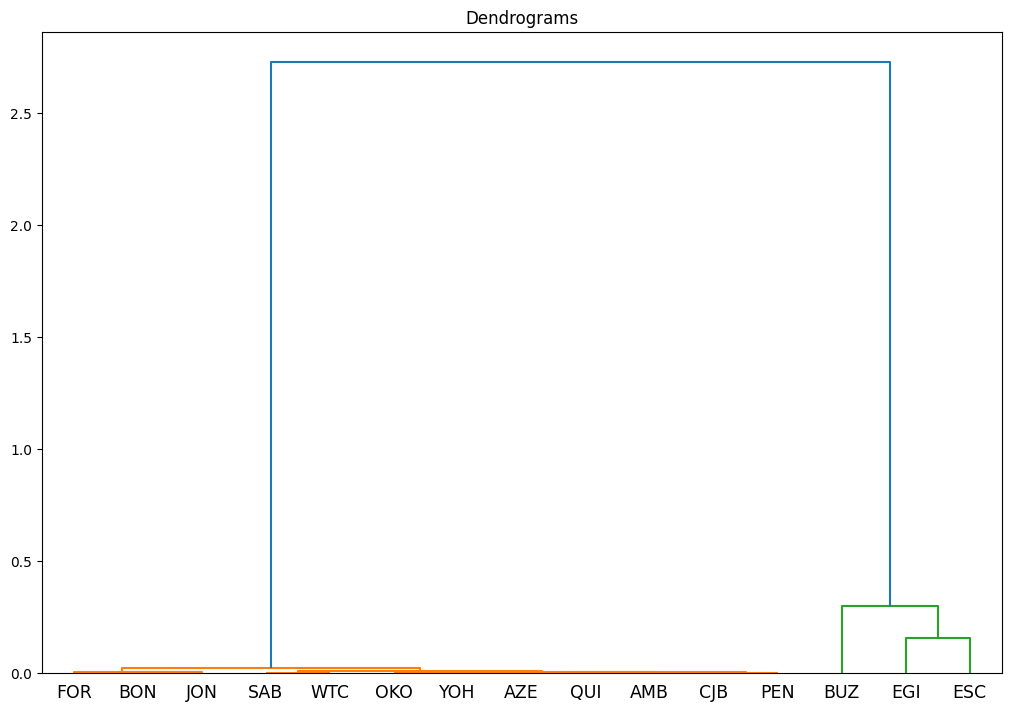

In [29]:
fig, ax = plt.subplots(figsize = (10, 7), constrained_layout = True)
ax.set_title("Dendrograms")  
dend = dendrogram(linkage(data_scaled, method='ward'), labels = data_scaled.index)
# ax.set_ylim(0, 1)
ax.tick_params(axis="x",labelsize = 12.5)
plt.show();

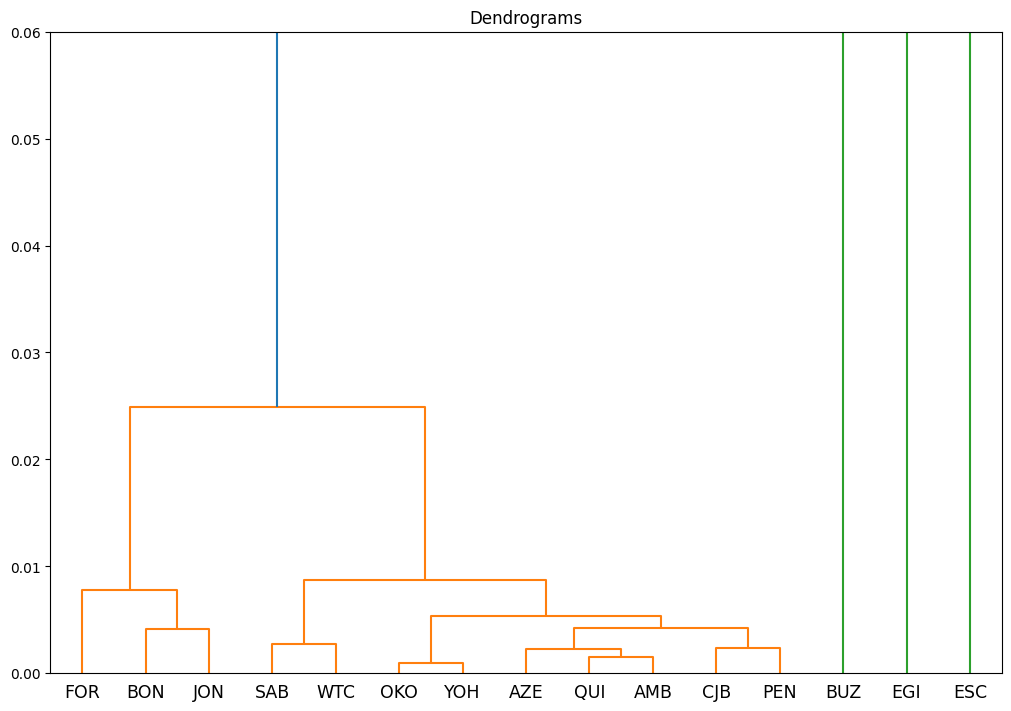

In [30]:
fig, ax = plt.subplots(figsize = (10, 7), constrained_layout = True)
ax.set_title("Dendrograms")  
dend = dendrogram(linkage(data_scaled, method='ward'), labels = data_scaled.index)
ax.set_ylim(0, 0.06)
ax.tick_params(axis="x",labelsize = 12.5)
plt.show();

## Escalado StandardScaler

In [31]:
scaler = StandardScaler(with_mean = True, with_std = True)
scaler.fit(df_floats[numeric_cols])
data_scaled = pd.DataFrame(scaler.transform(df_floats[numeric_cols]), columns = numeric_cols, index = index_info)

print("Mean :", data_scaled.API.mean())
print("Max :", data_scaled.API.max())
print("Min :", data_scaled.API.min())
print("Std :", data_scaled.API.std())
data_scaled.head(3)

Mean : -1.9984014443252818e-16
Max : 1.022095929420769
Min : -1.916285103982638
Std : 1.0350983390135313


API  Den@15°C(g/cc)   Sul(%w)  Overhead  OH/KNA Swing  \
TEXT                                                               
BON  -0.145021        1.476334  1.775940 -1.153614     -0.929980   
CJB   0.369694       -0.022518 -0.606096 -0.021706      0.382220   
FOR   0.170242        0.550987  0.029114 -0.555560     -0.431036   

      Kero Naphtha  Kerosene  KE/GL Swing  Light Gasoil  LGL/GP Swing  \
TEXT                                                                    
BON      -0.824684 -1.208916    -0.749902      0.705290      1.783374   
CJB       0.279429  0.585697     1.362283      0.808211     -0.233313   
FOR      -0.019417 -0.267691     0.380162      0.910232      1.031036   

      Atmospheric Gasoil  Atmospheric Residue  
TEXT                                           
BON             1.623303             0.734470  
CJB            -0.590765            -0.693638  
FOR             0.748448            -0.179374

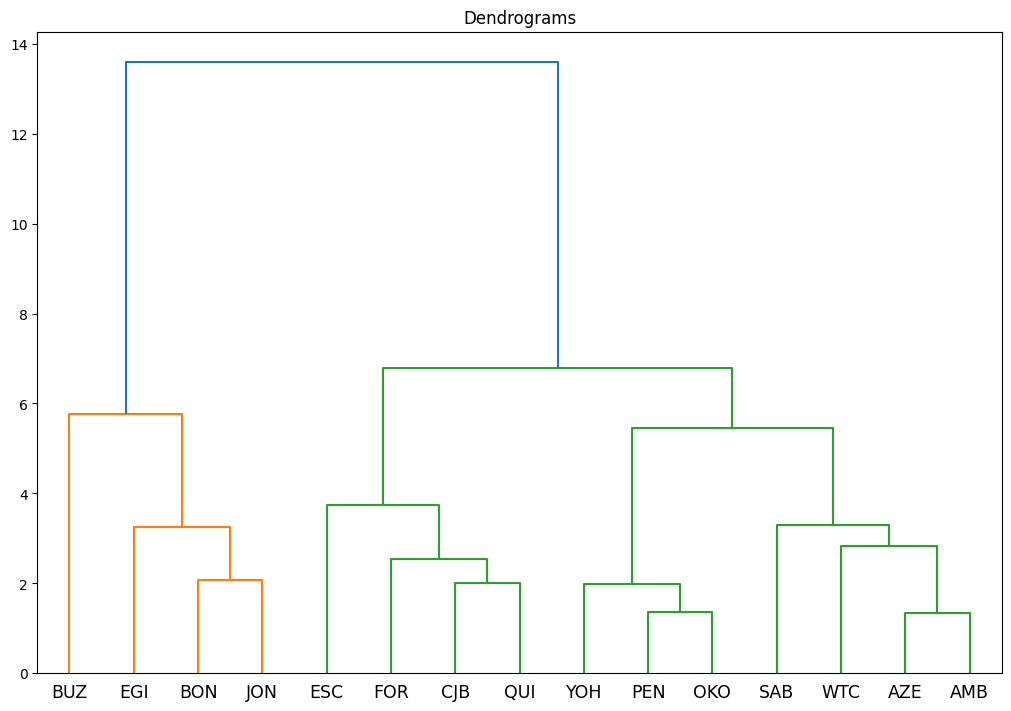

In [32]:
fig, ax = plt.subplots(figsize = (10, 7), constrained_layout = True)
ax.set_title("Dendrograms")  
dend = dendrogram(linkage(data_scaled, method='ward'), labels = data_scaled.index)
# ax.set_ylim(0, 1)
ax.tick_params(axis="x",labelsize = 12.5)
plt.show();

In [135]:
estudio = ["BUZ", "EGI", "BON", "JON"]
estudio = ["AMB", "BUZ"]
# estudio = ["BON", "FOR"]

df_assays[df_assays.TEXT.isin(estudio)]

0  TEXT          Name     Reference    API Den@15°C(g/cc) Sul(%w)  Overhead  \
11  BUZ        BUZIOS  CEPSA BUZIOS   0.28         0.8825    0.28  0.121454   
15  AMB  AMENAM BLEND  CEPSA AMENAM  38.98         0.8296    0.09  0.257194   

0  OH/KNA Swing Kero Naphtha  Kerosene KE/GL Swing Light Gasoil LGL/GP Swing  \
11     0.011655     0.023326  0.045222    0.006368     0.219713     0.005003   
15     0.021258     0.034822  0.071445    0.009804     0.315233     0.004426   

0  Atmospheric Gasoil Atmospheric Residue  
11           0.073894            0.493366  
15            0.05473            0.231087

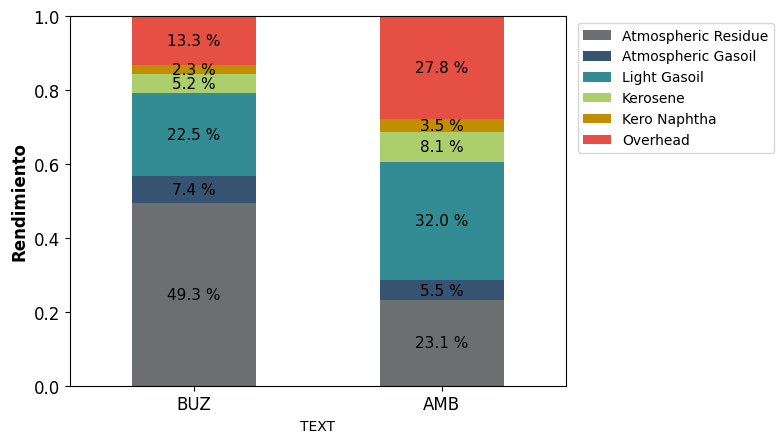

0             Name     Reference    API Den@15°C(g/cc) Sul(%w)  Overhead  \
TEXT                                                                       
BUZ         BUZIOS  CEPSA BUZIOS   0.28         0.8825    0.28  0.133109   
AMB   AMENAM BLEND  CEPSA AMENAM  38.98         0.8296    0.09  0.278452   

0    OH/KNA Swing Kero Naphtha  Kerosene KE/GL Swing Light Gasoil  \
TEXT                                                                
BUZ      0.011655     0.023326   0.05159    0.006368     0.224716   
AMB      0.021258     0.034822  0.081249    0.009804     0.319659   

0    LGL/GP Swing Atmospheric Gasoil Atmospheric Residue  
TEXT                                                      
BUZ      0.005003           0.073894            0.493366  
AMB      0.004426            0.05473            0.231087

In [136]:
colores_cepsa = ["#6C6F70", "#365472", "#338B93", "#ADCE6D", "#BF8F00", "#E54F44"]

df_plotear = df_assays[df_assays.TEXT.isin(estudio)]
df_plotear = df_plotear.set_index("TEXT")

stacked = ["Atmospheric Residue", "Atmospheric Gasoil", "Light Gasoil", "Kerosene", "Kero Naphtha", "Overhead"]

df_plotear["Overhead"] = df_plotear["Overhead"] + df_plotear["OH/KNA Swing"]
df_plotear["Kerosene"] = df_plotear["Kerosene"] + df_plotear["KE/GL Swing"]
df_plotear["Light Gasoil"] = df_plotear["Light Gasoil"] + df_plotear["LGL/GP Swing"]

ax = df_plotear[stacked].plot.bar(stacked=True, color = colores_cepsa)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.ylabel('Rendimiento', fontsize = 12, fontweight = 'bold')
plt.tick_params(axis='both', labelsize  = 12)
plt.ylim(0, 1)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{round(height*100, 1)} %'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize = 11)
        
plt.show();

df_plotear

es complejo.. generalmente para que consideremos que dos crudos se parecen, te diría: 

1 misma familia

2 cantidad de fondo y azufre parecido

3 cantidad y densidad de GO parecidas

4 si apuras mucho, ver que los rendimientos son parecidos en otros cortes tipo overhead o keroseno

depende de lo que consideremos como "parecido", si es para dividirlos por familias hay una tabla de "checks" hecha, si quieres te la mando

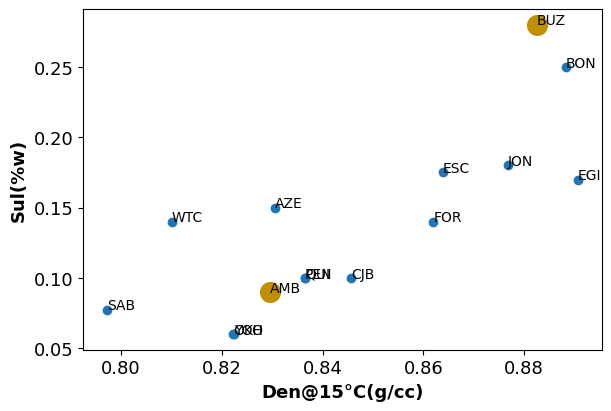

In [137]:
fig, ax = plt.subplots(figsize = (6, 4), constrained_layout = True)
ax.scatter(df_assays["Den@15°C(g/cc)"], df_assays["Sul(%w)"])
for index, row in df_assays.iterrows():
    ax.annotate(row["TEXT"], (row['Den@15°C(g/cc)'], row['Sul(%w)']), fontsize = 10)
ax.scatter(df_assays[df_assays.TEXT.isin(estudio)]["Den@15°C(g/cc)"], df_assays[df_assays.TEXT.isin(estudio)]["Sul(%w)"],  color = "#BF8F00", s = 200)
ax.set_xlabel("Den@15°C(g/cc)", fontsize = 13, fontweight = 'bold')
ax.set_ylabel("Sul(%w)", fontsize = 13, fontweight = 'bold')
ax.tick_params(axis = "both", labelsize = 13)

# ax.set_title(f"Top {b + 1} agrupaciones PIMS", fontsize = 15, fontweight = 'bold')
# ax.set_xlabel("Num_CaseID", fontsize = 13, fontweight = 'bold')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(y_axis)
# ax.tick_params(axis = "both", labelsize = 13)
# ax.bar_label(ax.containers[0], fmt='%.0f', padding = 3, fontsize = 13)
# ax.set_xlim(0, max_x)
plt.show();

In [35]:
estudio = ["AMB", "BUZ"]

df_estudio = df_assays[df_assays.TEXT.isin(estudio)]
df_display = df_estudio[["TEXT", "Name", "Reference", "Atmospheric Residue"]].reset_index(drop = True)
df_display["Atmospheric Residue"] = df_display["Atmospheric Residue"] * 100
df_display['Atmospheric Residue'] = df_display['Atmospheric Residue'].astype(float).round(2)
df_display.rename(columns={'Atmospheric Residue': 'Atmospheric Residue (%)'}, inplace = True)
display(df_display)
df_estudio = df_estudio.set_index("TEXT")

0 TEXT          Name     Reference  Atmospheric Residue (%)
0  BUZ        BUZIOS  CEPSA BUZIOS                    49.34
1  AMB  AMENAM BLEND  CEPSA AMENAM                    23.11

In [36]:
porcentaje_buz = np.arange(0, 110, 10)
gol_buz = df_estudio.loc['BUZ', 'Light Gasoil'] 
gol_amb = df_estudio.loc['AMB', 'Light Gasoil'] 

gol_mezcla = []
for porc in porcentaje_buz:
    prod = gol_buz * porc + gol_amb * (100 - porc)
    gol_mezcla.append(prod)
    
df_mezcla = pd.DataFrame({'% BUZ': porcentaje_buz,
                          'GOL_BUZ': gol_buz*100,
                          'GOL_AMB': gol_amb*100,
                          'GOL_Mezcla': gol_mezcla})
df_mezcla = df_mezcla.round({'GOL_BUZ': 2, 'GOL_AMB': 2, 'GOL_Mezcla': 2,})
df_mezcla

% BUZ  GOL_BUZ  GOL_AMB  GOL_Mezcla
0       0    21.97    31.52       31.52
1      10    21.97    31.52       30.57
2      20    21.97    31.52       29.61
3      30    21.97    31.52       28.66
4      40    21.97    31.52       27.70
5      50    21.97    31.52       26.75
6      60    21.97    31.52       25.79
7      70    21.97    31.52       24.84
8      80    21.97    31.52       23.88
9      90    21.97    31.52       22.93
10    100    21.97    31.52       21.97

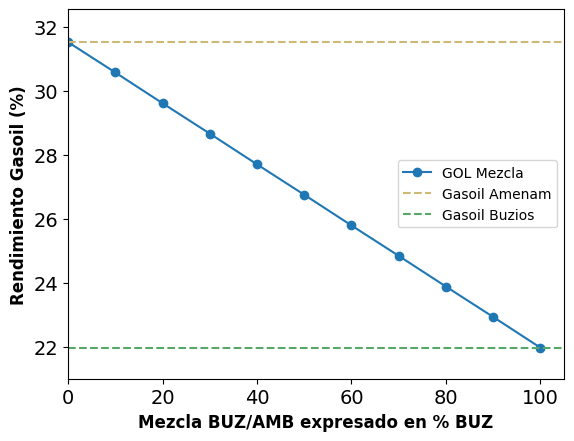

In [37]:
df_mezcla.plot("% BUZ", "GOL_Mezcla", marker="o", label = "GOL Mezcla")
plt.axhline(y = gol_amb*100, color='y', linestyle='--', label = "Gasoil Amenam")
plt.axhline(y = gol_buz*100, color='g', linestyle='--', label = "Gasoil Buzios")
plt.xlabel("Mezcla BUZ/AMB expresado en % BUZ", fontweight = 'bold', fontsize = 12)
plt.ylabel("Rendimiento Gasoil (%)", fontweight = 'bold', fontsize = 12)
plt.tick_params(axis = "both", labelsize = 14)
plt.xlim(left = 0)
plt.ylim(21, 32.55)
plt.legend()
plt.show();

In [38]:
porcentaje_buz = np.arange(0, 110, 10)
foa_buz = df_estudio.loc['BUZ', 'Atmospheric Residue'] 
foa_amb = df_estudio.loc['AMB', 'Atmospheric Residue'] 
lim_foa = 41.25

foa_mezcla = []
for porc in porcentaje_buz:
    prod = foa_buz * porc + foa_amb * (100 - porc)
    foa_mezcla.append(prod)
    
df_mezcla = pd.DataFrame({'% BUZ': porcentaje_buz,
                          'Lim_FoA': lim_foa,
                          'FoA_BUZ': foa_buz*100,
                          'FoA_AMB': foa_amb*100,
                          'FoA_Mezcla': foa_mezcla})
df_mezcla = df_mezcla.round({'FoA_BUZ': 2, 'FoA_AMB': 2, 'FoA_Mezcla': 2,})
df_mezcla

% BUZ  Lim_FoA  FoA_BUZ  FoA_AMB  FoA_Mezcla
0       0    41.25    49.34    23.11       23.11
1      10    41.25    49.34    23.11       25.73
2      20    41.25    49.34    23.11       28.35
3      30    41.25    49.34    23.11       30.98
4      40    41.25    49.34    23.11       33.60
5      50    41.25    49.34    23.11       36.22
6      60    41.25    49.34    23.11       38.85
7      70    41.25    49.34    23.11       41.47
8      80    41.25    49.34    23.11       44.09
9      90    41.25    49.34    23.11       46.71
10    100    41.25    49.34    23.11       49.34

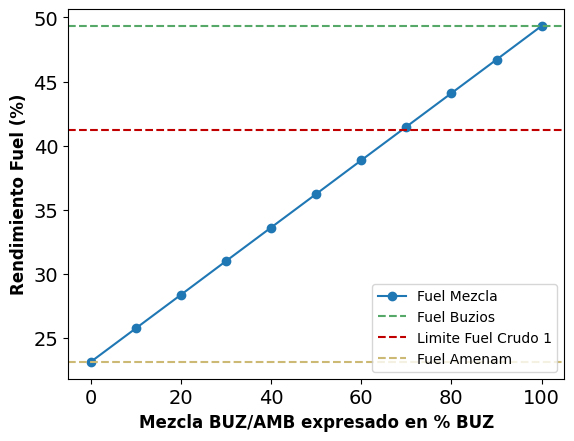

In [39]:
df_mezcla.plot("% BUZ", "FoA_Mezcla", marker="o", label = "Fuel Mezcla")
plt.axhline(y = foa_buz*100, color='g', linestyle='--', label = "Fuel Buzios")
plt.axhline(y = lim_foa, color='#C00000', linestyle='--', label = "Limite Fuel Crudo 1")
plt.axhline(y = foa_amb*100, color='y', linestyle='--', label = "Fuel Amenam")
plt.xlabel("Mezcla BUZ/AMB expresado en % BUZ", fontweight = 'bold', fontsize = 12)
plt.ylabel("Rendimiento Fuel (%)", fontweight = 'bold', fontsize = 12)
plt.tick_params(axis = "both", labelsize = 14)
plt.xlim(left = -5)
# plt.ylim(21, 32.55)
plt.legend(loc = 'lower right')
plt.show();